In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 526450425369095107
 xla_global_id: -1]

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam

import seaborn as sns
import random
import csv

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler



In [3]:
import numpy as np
import pandas as pd
import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection
from tensorflow.keras.layers import LSTM

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from matplotlib import pyplot as plt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, PReLU
from keras_tuner.tuners import RandomSearch

from sklearn.metrics import mean_absolute_percentage_error

Using TensorFlow backend


In [5]:
df=pd.read_csv('icecream_sales_date 2009-2022.csv', index_col='date', parse_dates=True,encoding="utf-8")
df.head()

,sales,tokyo_temperature,holiday,Unnamed: 4,temperature_difference_2009_2018,temperature_difference_2019_2021,Unnamed: 7,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,AVERAGE2009-2018,AVERAGE2019-2021
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,17.59,10.6,1,NaN,0.521429,0.033333,1.0,10.2,11.0,9.1,...,10.4,10.6,10.8,9.4,10.3,11.1,10.3,9.4,10.078571,10.566667
2009-01-02,23.83,11.6,1,NaN,1.521429,1.033333,2.0,11.5,9.9,11.2,...,10.4,12.2,12.1,10.1,11.6,13.3,14.0,10.5,11.142857,12.966667
2009-01-03,22.94,10.7,1,NaN,0.621429,0.133333,3.0,13.7,13.2,12.3,...,15.5,14.9,13.4,16.9,15.4,16.0,17.9,16.6,14.942857,16.433333
2009-01-04,17.14,11.1,1,NaN,1.021429,0.533333,4.0,20.2,16.6,18.9,...,19.3,20.3,19.9,22.1,19.0,18.2,20.6,20.2,19.471429,19.266667
2009-01-05,10.32,11.8,0,NaN,1.721429,1.233333,5.0,23.6,23.0,22.2,...,26.4,25.2,25.1,24.6,25.3,24.0,24.1,23.5,24.242857,24.466667


In [6]:
df_train=df[:"2018-12-31"]
df_test=df["2019-01-01":"2019-12-31"]

In [7]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)



In [8]:
dfs=df_train
dfr=df_train
dft=df_train
dfo=df_train
dfs.head()

,sales,tokyo_temperature,holiday,Unnamed: 4,temperature_difference_2009_2018,temperature_difference_2019_2021,Unnamed: 7,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,AVERAGE2009-2018,AVERAGE2019-2021
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,17.59,10.6,1,NaN,0.521429,0.033333,1.0,10.2,11.0,9.1,...,10.4,10.6,10.8,9.4,10.3,11.1,10.3,9.4,10.078571,10.566667
2009-01-02,23.83,11.6,1,NaN,1.521429,1.033333,2.0,11.5,9.9,11.2,...,10.4,12.2,12.1,10.1,11.6,13.3,14.0,10.5,11.142857,12.966667
2009-01-03,22.94,10.7,1,NaN,0.621429,0.133333,3.0,13.7,13.2,12.3,...,15.5,14.9,13.4,16.9,15.4,16.0,17.9,16.6,14.942857,16.433333
2009-01-04,17.14,11.1,1,NaN,1.021429,0.533333,4.0,20.2,16.6,18.9,...,19.3,20.3,19.9,22.1,19.0,18.2,20.6,20.2,19.471429,19.266667
2009-01-05,10.32,11.8,0,NaN,1.721429,1.233333,5.0,23.6,23.0,22.2,...,26.4,25.2,25.1,24.6,25.3,24.0,24.1,23.5,24.242857,24.466667


In [9]:
%load_ext rpy2.ipython

In [10]:
%%R
table <- read.csv('icecream_sales_date 2009-2022.csv')
table

           date sales tokyo_temperature holiday  X
1      2009/1/1 17.59              10.6       1 NA
2      2009/1/2 23.83              11.6       1 NA
3      2009/1/3 22.94              10.7       1 NA
4      2009/1/4 17.14              11.1       1 NA
5      2009/1/5 10.32              11.8       0 NA
6      2009/1/6 10.75              12.5       0 NA
7      2009/1/7 10.57               9.1       0 NA
8      2009/1/8  9.17               9.8       0 NA
9      2009/1/9  8.20               6.8       0 NA
10    2009/1/10 12.31              10.8       1 NA
11    2009/1/11 13.75               7.9       1 NA
12    2009/1/12 12.13               8.4       1 NA
13    2009/1/13  7.69              10.3       0 NA
14    2009/1/14  6.49               9.8       0 NA
15    2009/1/15  5.30               7.6       0 NA
16    2009/1/16  7.62               9.0       0 NA
17    2009/1/17 13.79              11.6       1 NA
18    2009/1/18 16.08               8.3       1 NA
19    2009/1/19  6.73          

160    2009/6/9 22.03              24.3       0 NA
161   2009/6/10 18.55              25.9       0 NA
162   2009/6/11 19.39              25.0       0 NA
163   2009/6/12 24.47              28.1       0 NA
164   2009/6/13 37.77              26.8       1 NA
165   2009/6/14 36.92              23.9       1 NA
166   2009/6/15 16.98              23.9       0 NA
167   2009/6/16 22.45              23.3       0 NA
168   2009/6/17 25.26              24.6       0 NA
169   2009/6/18 23.53              24.1       0 NA
170   2009/6/19 26.50              26.7       0 NA
171   2009/6/20 41.07              27.6       1 NA
172   2009/6/21 36.51              24.0       1 NA
173   2009/6/22 23.12              24.9       0 NA
174   2009/6/23 32.51              29.7       0 NA
175   2009/6/24 24.44              26.9       0 NA
176   2009/6/25 31.37              28.2       0 NA
177   2009/6/26 31.51              31.9       0 NA
178   2009/6/27 49.42              31.8       1 NA
179   2009/6/28 39.30          

320  2009/11/16 12.26              17.4       0 NA
321  2009/11/17  7.79              12.7       0 NA
322  2009/11/18  7.63              14.9       0 NA
323  2009/11/19 11.80               9.4       0 NA
324  2009/11/20 10.21              14.5       0 NA
325  2009/11/21 14.66              17.5       1 NA
326  2009/11/22 17.47              10.2       1 NA
327  2009/11/23 12.71              15.7       1 NA
328  2009/11/24  9.19              14.0       0 NA
329  2009/11/25 11.37              16.6       0 NA
330  2009/11/26 10.71              18.1       0 NA
331  2009/11/27 12.52              18.0       0 NA
332  2009/11/28 16.35              17.7       1 NA
333  2009/11/29 15.30              12.9       1 NA
334  2009/11/30 11.16              11.7       0 NA
335   2009/12/1 12.45              14.7       0 NA
336   2009/12/2 13.76              16.2       0 NA
337   2009/12/3  6.69              11.8       0 NA
338   2009/12/4 10.47              14.9       0 NA
339   2009/12/5 15.45          

480   2010/4/25 26.19              16.7       1 NA
481   2010/4/26 13.43              19.9       0 NA
482   2010/4/27 12.16              15.7       0 NA
483   2010/4/28 13.74              15.4       0 NA
484   2010/4/29 24.94              23.4       1 NA
485   2010/4/30 15.48              20.0       0 NA
486    2010/5/1 29.79              20.1       1 NA
487    2010/5/2 48.82              22.1       1 NA
488    2010/5/3 40.92              24.0       1 NA
489    2010/5/4 50.82              24.7       1 NA
490    2010/5/5 42.26              27.6       1 NA
491    2010/5/6 19.76              27.8       0 NA
492    2010/5/7 17.16              22.3       0 NA
493    2010/5/8 30.16              23.7       1 NA
494    2010/5/9 38.96              26.6       1 NA
495   2010/5/10 13.09              22.5       0 NA
496   2010/5/11 10.14              19.7       0 NA
497   2010/5/12 13.59              21.8       0 NA
498   2010/5/13 14.35              20.9       0 NA
499   2010/5/14 15.16          

640   2010/10/2 27.10              24.9       1 NA
641   2010/10/3 22.67              24.9       1 NA
642   2010/10/4 11.83              22.6       0 NA
643   2010/10/5 15.96              26.9       0 NA
644   2010/10/6 16.58              25.7       0 NA
645   2010/10/7 15.62              24.8       0 NA
646   2010/10/8 18.16              25.0       0 NA
647   2010/10/9 16.95              19.1       1 NA
648  2010/10/10 27.88              23.6       1 NA
649  2010/10/11 30.03              28.3       1 NA
650  2010/10/12 15.90              25.8       0 NA
651  2010/10/13 15.13              26.1       0 NA
652  2010/10/14 13.70              23.4       0 NA
653  2010/10/15 15.46              23.6       0 NA
654  2010/10/16 20.74              24.8       1 NA
655  2010/10/17 21.80              23.3       1 NA
656  2010/10/18 13.24              22.7       0 NA
657  2010/10/19 11.60              20.6       0 NA
658  2010/10/20 15.53              20.0       0 NA
659  2010/10/21 10.91          

800   2011/3/11  7.68              11.3       0 NA
801   2011/3/12 13.70              12.9       1 NA
802   2011/3/13 16.19              15.9       1 NA
803   2011/3/14  6.73              20.2       0 NA
804   2011/3/15  6.91              14.0       0 NA
805   2011/3/16  6.00              13.0       0 NA
806   2011/3/17  8.08               8.9       0 NA
807   2011/3/18  8.57              10.1       0 NA
808   2011/3/19 15.21              18.2       1 NA
809   2011/3/20 15.63              17.0       1 NA
810   2011/3/21  9.64              13.4       1 NA
811   2011/3/22  8.45               7.6       0 NA
812   2011/3/23  9.87              10.0       0 NA
813   2011/3/24  7.99               8.1       0 NA
814   2011/3/25 10.76              13.4       0 NA
815   2011/3/26 14.15              11.6       1 NA
816   2011/3/27 15.01              12.0       1 NA
817   2011/3/28 11.59              12.7       0 NA
818   2011/3/29 11.87              15.3       0 NA
819   2011/3/30 13.50          

960   2011/8/18 37.98              36.1       0 NA
961   2011/8/19 29.73              30.9       0 NA
962   2011/8/20 34.55              25.8       1 NA
963   2011/8/21 28.98              23.5       1 NA
964   2011/8/22 22.41              22.9       0 NA
965   2011/8/23 27.44              30.9       0 NA
966   2011/8/24 30.28              32.0       0 NA
967   2011/8/25 31.41              29.3       0 NA
968   2011/8/26 30.18              31.9       0 NA
969   2011/8/27 42.29              27.5       1 NA
970   2011/8/28 45.53              29.8       1 NA
971   2011/8/29 36.18              29.8       0 NA
972   2011/8/30 32.59              31.7       0 NA
973   2011/8/31 27.44              30.4       0 NA
974    2011/9/1 24.56              31.9       0 NA
975    2011/9/2 24.39              31.9       0 NA
976    2011/9/3 32.34              30.4       1 NA
977    2011/9/4 35.17              29.4       1 NA
978    2011/9/5 19.73              29.0       0 NA
979    2011/9/6 22.87          

1120  2012/1/25  7.70               9.3       0 NA
1121  2012/1/26  8.68               6.4       0 NA
1122  2012/1/27  6.92               8.0       0 NA
1123  2012/1/28 11.76               6.1       1 NA
1124  2012/1/29 14.63               6.8       1 NA
1125  2012/1/30  7.25               6.4       0 NA
1126  2012/1/31  7.04               8.1       0 NA
1127   2012/2/1 10.43              12.4       0 NA
1128   2012/2/2  7.21               6.0       0 NA
1129   2012/2/3  7.70               6.7       0 NA
1130   2012/2/4 11.70              10.8       1 NA
1131   2012/2/5 13.89               9.0       1 NA
1132   2012/2/6  7.67               5.9       0 NA
1133   2012/2/7  7.42              10.0       0 NA
1134   2012/2/8  7.64               9.9       0 NA
1135   2012/2/9 10.02               8.1       0 NA
1136  2012/2/10  8.39               9.4       0 NA
1137  2012/2/11 14.45               9.1       1 NA
1138  2012/2/12 12.37               9.5       1 NA
1139  2012/2/13  8.50          

1280   2012/7/4 31.08              29.0       0 NA
1281   2012/7/5 29.60              29.4       0 NA
1282   2012/7/6 24.00              28.8       0 NA
1283   2012/7/7 34.42              25.1       1 NA
1284   2012/7/8 42.33              26.6       1 NA
1285   2012/7/9 25.90              28.9       0 NA
1286  2012/7/10 30.98              31.0       0 NA
1287  2012/7/11 39.45              30.9       0 NA
1288  2012/7/12 28.26              27.4       0 NA
1289  2012/7/13 30.38              31.0       0 NA
1290  2012/7/14 41.39              33.0       1 NA
1291  2012/7/15 50.85              32.7       1 NA
1292  2012/7/16 50.71              33.0       1 NA
1293  2012/7/17 42.80              34.4       0 NA
1294  2012/7/18 36.86              32.1       0 NA
1295  2012/7/19 34.81              35.1       0 NA
1296  2012/7/20 25.89              22.2       0 NA
1297  2012/7/21 38.97              21.9       1 NA
1298  2012/7/22 39.47              23.3       1 NA
1299  2012/7/23 33.83          

1440 2012/12/11  8.24              12.0       0 NA
1441 2012/12/12  8.26              11.2       0 NA
1442 2012/12/13  8.04              11.9       0 NA
1443 2012/12/14  8.71              12.0       0 NA
1444 2012/12/15 15.40               9.1       1 NA
1445 2012/12/16 22.61              18.2       1 NA
1446 2012/12/17 10.21               9.5       0 NA
1447 2012/12/18 10.31              15.6       0 NA
1448 2012/12/19 10.15               9.0       0 NA
1449 2012/12/20 10.97              10.3       0 NA
1450 2012/12/21 11.21               9.8       0 NA
1451 2012/12/22 20.17              11.4       1 NA
1452 2012/12/23 23.60              10.0       1 NA
1453 2012/12/24 24.09               8.3       1 NA
1454 2012/12/25 11.53               9.7       0 NA
1455 2012/12/26  9.21               7.5       0 NA
1456 2012/12/27 10.60               7.4       0 NA
1457 2012/12/28 12.57               7.4       0 NA
1458 2012/12/29 20.73              11.5       1 NA
1459 2012/12/30 21.57          

1600  2013/5/20 19.95              21.0       0 NA
1601  2013/5/21 24.73              26.5       0 NA
1602  2013/5/22 23.86              26.6       0 NA
1603  2013/5/23 19.48              26.2       0 NA
1604  2013/5/24 26.85              28.2       0 NA
1605  2013/5/25 39.11              22.9       1 NA
1606  2013/5/26 42.73              26.6       1 NA
1607  2013/5/27 23.10              26.1       0 NA
1608  2013/5/28 19.35              25.4       0 NA
1609  2013/5/29 18.96              24.4       0 NA
1610  2013/5/30 15.26              22.7       0 NA
1611  2013/5/31 20.75              27.2       0 NA
1612   2013/6/1 36.22              26.0       1 NA
1613   2013/6/2 29.02              23.3       1 NA
1614   2013/6/3 22.16              24.9       0 NA
1615   2013/6/4 26.78              29.1       0 NA
1616   2013/6/5 26.48              27.7       0 NA
1617   2013/6/6 21.16              25.3       0 NA
1618   2013/6/7 24.10              25.4       0 NA
1619   2013/6/8 37.88          

1760 2013/10/27 21.12              21.1       1 NA
1761 2013/10/28 10.62              20.3       0 NA
1762 2013/10/29  9.05              16.0       0 NA
1763 2013/10/30 13.29              22.1       0 NA
1764 2013/10/31 13.19              21.5       0 NA
1765  2013/11/1 13.01              20.5       0 NA
1766  2013/11/2 18.24              17.0       1 NA
1767  2013/11/3 18.86              21.0       1 NA
1768  2013/11/4 17.17              18.4       1 NA
1769  2013/11/5 11.69              19.7       0 NA
1770  2013/11/6 12.04              20.7       0 NA
1771  2013/11/7  8.34              17.8       0 NA
1772  2013/11/8  9.95              21.5       0 NA
1773  2013/11/9 15.38              15.1       1 NA
1774 2013/11/10 15.74              21.4       1 NA
1775 2013/11/11  7.01              16.8       0 NA
1776 2013/11/12  9.31              12.5       0 NA
1777 2013/11/13 12.82              14.1       0 NA
1778 2013/11/14 10.15              14.5       0 NA
1779 2013/11/15  7.77          

1920   2014/4/5 18.41              14.9       1 NA
1921   2014/4/6 17.72              13.4       1 NA
1922   2014/4/7 10.23              16.5       0 NA
1923   2014/4/8 14.08              22.3       0 NA
1924   2014/4/9 15.97              20.4       0 NA
1925  2014/4/10 12.79              22.9       0 NA
1926  2014/4/11 15.47              18.7       0 NA
1927  2014/4/12 24.58              20.0       1 NA
1928  2014/4/13 19.29              18.7       1 NA
1929  2014/4/14 11.17              17.6       0 NA
1930  2014/4/15 13.39              20.6       0 NA
1931  2014/4/16 17.45              23.3       0 NA
1932  2014/4/17 16.02              21.8       0 NA
1933  2014/4/18 11.72              18.2       0 NA
1934  2014/4/19 21.10              17.9       1 NA
1935  2014/4/20 19.91              14.1       1 NA
1936  2014/4/21 11.61              17.5       0 NA
1937  2014/4/22 13.28              20.0       0 NA
1938  2014/4/23 15.14              21.3       0 NA
1939  2014/4/24 18.14          

2080  2014/9/12 22.80              27.5       0 NA
2081  2014/9/13 31.38              27.3       1 NA
2082  2014/9/14 42.39              28.7       1 NA
2083  2014/9/15 35.12              26.0       1 NA
2084  2014/9/16 23.22              29.5       0 NA
2085  2014/9/17 19.85              26.1       0 NA
2086  2014/9/18 16.35              25.9       0 NA
2087  2014/9/19 17.56              25.6       0 NA
2088  2014/9/20 29.56              22.3       1 NA
2089  2014/9/21 27.80              26.7       1 NA
2090  2014/9/22 18.67              27.2       0 NA
2091  2014/9/23 26.37              26.4       1 NA
2092  2014/9/24 17.01              25.9       0 NA
2093  2014/9/25 18.38              28.5       0 NA
2094  2014/9/26 21.03              28.1       0 NA
2095  2014/9/27 29.13              23.5       1 NA
2096  2014/9/28 34.80              27.0       1 NA
2097  2014/9/29 19.37              28.3       0 NA
2098  2014/9/30 20.80              29.1       0 NA
2099  2014/10/1 19.70          

2240  2015/2/19 10.31              13.0       0 NA
2241  2015/2/20 10.79              11.9       0 NA
2242  2015/2/21 17.22              10.5       1 NA
2243  2015/2/22 16.55               8.0       1 NA
2244  2015/2/23  9.74              19.2       0 NA
2245  2015/2/24 12.84              12.7       0 NA
2246  2015/2/25 15.79              13.2       0 NA
2247  2015/2/26 13.39               7.9       0 NA
2248  2015/2/27 12.47              15.3       0 NA
2249  2015/2/28 19.30              12.8       1 NA
2250   2015/3/1 18.75               9.8       1 NA
2251   2015/3/2 12.05              14.1       0 NA
2252   2015/3/3 12.78               7.7       0 NA
2253   2015/3/4 10.66              17.5       0 NA
2254   2015/3/5 12.10              14.3       0 NA
2255   2015/3/6 12.81              12.0       0 NA
2256   2015/3/7 20.87               8.2       1 NA
2257   2015/3/8 18.61              10.9       1 NA
2258   2015/3/9  8.23               9.9       0 NA
2259  2015/3/10  7.98          

2400  2015/7/29 44.05              32.5       0 NA
2401  2015/7/30 41.20              34.3       0 NA
2402  2015/7/31 44.90              35.0       0 NA
2403   2015/8/1 70.91              35.3       1 NA
2404   2015/8/2 72.45              35.1       1 NA
2405   2015/8/3 48.36              35.0       0 NA
2406   2015/8/4 59.65              35.1       0 NA
2407   2015/8/5 54.88              35.2       0 NA
2408   2015/8/6 45.70              35.9       0 NA
2409   2015/8/7 49.05              37.7       0 NA
2410   2015/8/8 65.85              32.6       1 NA
2411   2015/8/9 61.86              33.4       1 NA
2412  2015/8/10 47.62              31.9       0 NA
2413  2015/8/11 59.80              35.5       0 NA
2414  2015/8/12 45.42              33.7       0 NA
2415  2015/8/13 57.09              30.5       0 NA
2416  2015/8/14 55.58              31.8       0 NA
2417  2015/8/15 47.55              33.1       1 NA
2418  2015/8/16 54.05              31.9       1 NA
2419  2015/8/17 31.37          

2560   2016/1/5 18.73              15.4       0 NA
2561   2016/1/6  9.82              11.3       0 NA
2562   2016/1/7 13.28              12.9       0 NA
2563   2016/1/8 12.80              10.9       0 NA
2564   2016/1/9 18.49              11.6       1 NA
2565  2016/1/10 18.68              12.9       1 NA
2566  2016/1/11 16.15              10.5       1 NA
2567  2016/1/12  8.59               6.1       0 NA
2568  2016/1/13 10.16               9.7       0 NA
2569  2016/1/14  9.55              11.4       0 NA
2570  2016/1/15 10.33              10.9       0 NA
2571  2016/1/16 19.52              11.8       1 NA
2572  2016/1/17 18.07               8.6       1 NA
2573  2016/1/18  7.34               6.2       0 NA
2574  2016/1/19 10.23               8.6       0 NA
2575  2016/1/20 10.65               9.1       0 NA
2576  2016/1/21 11.16               9.5       0
2940  2017/1/20 11.17               3.8       0 NA
2941  2017/1/21 19.70              11.0       1 NA
2942  2017/1/22 16.96             

3083  2017/6/12 22.24              26.3       0 NA
3084  2017/6/13 21.75              19.4       0 NA
3085  2017/6/14 24.38              24.6       0 NA
3086  2017/6/15 25.99              26.0       0 NA
3087  2017/6/16 29.61              29.0       0 NA
3088  2017/6/17 41.51              27.7       1 NA
3089  2017/6/18 39.04              22.5       1 NA
3090  2017/6/19 29.34              30.5       0 NA
3091  2017/6/20 30.87              28.0       0 NA
3092  2017/6/21 20.37              24.4       0 NA
3093  2017/6/22 29.30              27.9       0 NA
3094  2017/6/23 33.26              30.2       0 NA
3095  2017/6/24 42.43              29.0       1 NA
3096  2017/6/25 41.45              23.9       1 NA
3097  2017/6/26 26.84              25.9       0 NA
3098  2017/6/27 25.22              25.6       0 NA
3099  2017/6/28 29.71              25.0       0 NA
3100  2017/6/29 32.25              29.1       0 NA
3101  2017/6/30 30.69              25.7       0 NA
3102   2017/7/1 47.82          

3243 2017/11/19 15.33              12.3       1 NA
3244 2017/11/20 13.52              10.4       0 NA
3245 2017/11/21 12.42              11.9       0 NA
3246 2017/11/22 11.09              11.5       0 NA
3247 2017/11/23 19.70              14.5       1 NA
3248 2017/11/24 13.21              14.8       0 NA
3249 2017/11/25 24.12              14.4       1 NA
3250 2017/11/26 22.73              18.2       1 NA
3251 2017/11/27 12.42              14.5       0 NA
3252 2017/11/28 11.83              15.0       0 NA
3253 2017/11/29 13.86              19.2       0 NA
3254 2017/11/30 13.76              14.3       0 NA
3255  2017/12/1 16.90              10.2       0 NA
3256  2017/12/2 23.25              11.1       1 NA
3257  2017/12/3 21.06              12.5       1 NA
3258  2017/12/4 14.15              12.6       0 NA
3259  2017/12/5 17.45              14.5       0 NA
3260  2017/12/6 13.95              11.1       0 NA
3261  2017/12/7 15.10              11.5       0 NA
3262  2017/12/8 10.29          

3403  2018/4/28 42.08              26.1       1 NA
3404  2018/4/29 45.24              25.6       1 NA
3405  2018/4/30 36.97              25.7       1 NA
3406   2018/5/1 31.87              28.1       0 NA
3407   2018/5/2 27.74              25.3       0 NA
3408   2018/5/3 34.75              27.4       1 NA
3409   2018/5/4 36.41              23.8       1 NA
3410   2018/5/5 42.35              24.3       1 NA
3411   2018/5/6 41.07              26.5       1 NA
3412   2018/5/7 16.03              21.6       0 NA
3413   2018/5/8 17.18              14.6       0 NA
3414   2018/5/9 17.07              14.3       0 NA
3415  2018/5/10 21.51              15.8       0 NA
3416  2018/5/11 21.39              22.4       0 NA
3417  2018/5/12 34.76              24.6       1 NA
3418  2018/5/13 27.86              21.4       1 NA
3419  2018/5/14 20.44              28.6       0 NA
3420  2018/5/15 28.90              28.4       0 NA
3421  2018/5/16 30.64              29.0       0 NA
3422  2018/5/17 28.31          

3563  2018/10/5 21.69              20.1       0 NA
3564  2018/10/6 32.71              29.3       1 NA
3565  2018/10/7 38.90              32.3       1 NA
3566  2018/10/8 31.22              24.1       1 NA
3567  2018/10/9 24.11              26.4       0 NA
3568 2018/10/10 17.47              26.4       0 NA
3569 2018/10/11 16.72              23.7       0 NA
3570 2018/10/12 15.95              22.5       0 NA
3571 2018/10/13 25.88              18.5       1 NA
3572 2018/10/14 25.33              19.6       1 NA
3573 2018/10/15 14.46              21.1       0 NA
3574 2018/10/16 16.32              21.2       0 NA
3575 2018/10/17 18.30              22.3       0 NA
3576 2018/10/18 20.55              21.7       0 NA
3577 2018/10/19 16.56              20.1       0 NA
3578 2018/10/20 24.30              22.0       1 NA
3579 2018/10/21 27.85              21.6       1 NA
3580 2018/10/22 15.51              21.6       0 NA
3581 2018/10/23 16.69              16.0       0 NA
3582 2018/10/24 14.38          

3723  2019/3/14 12.23              14.3       0 NA
3724  2019/3/15 14.61              15.0       0 NA
3725  2019/3/16 19.43              13.9       1 NA
3726  2019/3/17 21.51              15.3       1 NA
3727  2019/3/18 13.53              14.5       0 NA
3728  2019/3/19 13.97              19.2       0 NA
3729  2019/3/20 21.63              21.5       0 NA
3730  2019/3/21 19.93              22.3       1 NA
3731  2019/3/22 20.71              23.9       0 NA
3732  2019/3/23 18.94               9.0       1 NA
3733  2019/3/24 19.49              15.4       1 NA
3734  2019/3/25 15.16              15.0       0 NA
3735  2019/3/26 20.00              15.9       0 NA
3736  2019/3/27 18.98              19.7       0 NA
3737  2019/3/28 16.04              16.9       0 NA
3738  2019/3/29 13.61               9.3       0 NA
3739  2019/3/30 19.08              11.7       1 NA
3740  2019/3/31 23.42              16.3       1 NA
3741   2019/4/1 16.40              16.2       0 NA
3742   2019/4/2 16.64          

686                       -6.31428571                    -7.100000e+00  NA
687                       -2.61428571                    -3.400000e+00  NA
688                       -1.91428571                    -2.700000e+00  NA
689                       -0.81428571                    -1.600000e+00  NA
690                       -0.51428571                    -1.300000e+00  NA
691                       -2.01428571                    -2.800000e+00  NA
692                       -0.21428571                    -1.000000e+00  NA
693                       -3.21428571                    -4.000000e+00  NA
694                       -3.41428571                    -4.200000e+00  NA
695                       -1.51428571                    -2.300000e+00  NA
696                       -3.01428571                    -3.800000e+00  NA
697                        2.18571429                     1.400000e+00  NA
698                       -1.51428571                    -2.300000e+00  NA
699                      

795                        0.05714286                    -1.433333e+00  NA
796                       -5.64285714                    -7.133333e+00  NA
797                       -4.94285714                    -6.433333e+00  NA
798                       -2.94285714                    -4.433333e+00  NA
799                       -4.94285714                    -6.433333e+00  NA
800                       -3.64285714                    -5.133333e+00  NA
801                       -2.04285714                    -3.533333e+00  NA
802                        0.95714286                    -5.333333e-01  NA
803                        5.25714286                     3.766667e+00  NA
804                       -0.94285714                    -2.433333e+00  NA
805                       -1.94285714                    -3.433333e+00  NA
806                       -6.04285714                    -7.533333e+00  NA
807                       -4.84285714                    -6.333333e+00  NA
808                      

904                        5.67142857                     5.333333e+00  NA
905                        6.17142857                     5.833333e+00  NA
906                        1.37142857                     1.033333e+00  NA
907                       -3.82857143                    -4.166667e+00  NA
908                       -2.72857143                    -3.066667e+00  NA
909                        5.37142857                     5.033333e+00  NA
910                        8.57142857                     8.233333e+00  NA
911                        7.07142857                     6.733333e+00  NA
912                        3.52142857                     5.400000e+00  NA
913                       -1.47857143                     4.000000e-01  NA
914                        0.72142857                     2.600000e+00  NA
915                        3.92142857                     5.800000e+00  NA
916                        1.92142857                     3.800000e+00  NA
917                      

1013                       1.91428571                     1.833333e+00  NA
1014                       2.81428571                     2.733333e+00  NA
1015                       1.01428571                     9.333333e-01  NA
1016                       1.31428571                     1.233333e+00  NA
1017                       3.01428571                     2.933333e+00  NA
1018                       4.51428571                     4.433333e+00  NA
1019                       7.31428571                     7.233333e+00  NA
1020                       2.21428571                     2.133333e+00  NA
1021                      -1.28571429                    -1.366667e+00  NA
1022                      -4.88571429                    -4.966667e+00  NA
1023                      -1.58571429                    -1.666667e+00  NA
1024                      -1.18571429                    -1.266667e+00  NA
1025                       0.61428571                     5.333333e-01  NA
1026                     

1122                      -1.95714286                    -2.566667e+00  NA
1123                      -3.85714286                    -4.466667e+00  NA
1124                      -3.15714286                    -3.766667e+00  NA
1125                      -3.55714286                    -4.166667e+00  NA
1126                      -1.85714286                    -2.466667e+00  NA
1127                       1.82857143                    -5.666667e-01  NA
1128                      -4.57142857                    -6.966667e+00  NA
1129                      -3.87142857                    -6.266667e+00  NA
1130                       0.22857143                    -2.166667e+00  NA
1131                      -1.57142857                    -3.966667e+00  NA
1132                      -4.67142857                    -7.066667e+00  NA
1133                      -0.57142857                    -2.966667e+00  NA
1134                      -0.67142857                    -3.066667e+00  NA
1135                     

1231                       2.38571429                     2.733333e+00  NA
1232                       2.08571429                     2.433333e+00  NA
1233                      -1.41428571                    -1.066667e+00  NA
1234                       0.38571429                     7.333333e-01  NA
1235                      -0.01428571                     3.333333e-01  NA
1236                      -0.91428571                    -5.666667e-01  NA
1237                      -8.21428571                    -7.866667e+00  NA
1238                       0.18571429                     5.333333e-01  NA
1239                       2.28571429                     2.633333e+00  NA
1240                      -2.71428571                    -2.366667e+00  NA
1241                       0.18571429                     5.333333e-01  NA
1242                       2.18571429                     2.533333e+00  NA
1243                       0.18571429                     5.333333e-01  NA
1244                     

1340                       1.02857143                     7.000000e-01  NA
1341                       3.02857143                     2.700000e+00  NA
1342                       3.82857143                     3.500000e+00  NA
1343                       5.62857143                     5.300000e+00  NA
1344                       5.32857143                     5.000000e+00  NA
1345                       3.82857143                     3.500000e+00  NA
1346                       4.92857143                     4.600000e+00  NA
1347                       5.22857143                     4.900000e+00  NA
1348                       5.52857143                     5.200000e+00  NA
1349                       5.92857143                     5.600000e+00  NA
1350                       5.32857143                     5.000000e+00  NA
1351                       6.22857143                     5.900000e+00  NA
1352                       4.52857143                     4.200000e+00  NA
1353                     

1449                      -1.80000000                    -2.166667e+00  NA
1450                      -2.30000000                    -2.666667e+00  NA
1451                      -0.70000000                    -1.066667e+00  NA
1452                      -2.10000000                    -2.466667e+00  NA
1453                      -3.80000000                    -4.166667e+00  NA
1454                      -2.40000000                    -2.766667e+00  NA
1455                      -4.60000000                    -4.966667e+00  NA
1456                      -4.70000000                    -5.066667e+00  NA
1457                      -4.70000000                    -5.066667e+00  NA
1458                      -0.60000000                    -9.666667e-01  NA
1459                      -3.40000000                    -3.766667e+00  NA
1460                      -0.80000000                    -1.166667e+00  NA
1461                      -0.35714286                    -9.666667e-01  NA
1462                     

1558                       0.35714286                     9.333333e-01  NA
1559                       1.85714286                     2.433333e+00  NA
1560                      -1.94285714                    -1.366667e+00  NA
1561                      -6.24285714                    -5.666667e+00  NA
1562                      -4.14285714                    -3.566667e+00  NA
1563                      -3.64285714                    -3.066667e+00  NA
1564                       0.75714286                     1.333333e+00  NA
1565                       2.75714286                     3.333333e+00  NA
1566                       1.55714286                     2.133333e+00  NA
1567                       3.45714286                     4.033333e+00  NA
1568                       3.55714286                     4.133333e+00  NA
1569                       0.05714286                     6.333333e-01  NA
1570                      -8.34285714                    -7.766667e+00  NA
1571                     

1667                       1.40000000                     3.800000e+00  NA
1668                       2.20000000                     4.600000e+00  NA
1669                       0.90000000                     3.300000e+00  NA
1670                      -3.60000000                    -1.200000e+00  NA
1671                       0.30000000                     2.700000e+00  NA
1672                      -0.20000000                     2.200000e+00  NA
1673                       1.01428571                    -3.333333e-02  NA
1674                      -2.68571429                    -3.733333e+00  NA
1675                      -0.98571429                    -2.033333e+00  NA
1676                      -0.48571429                    -1.533333e+00  NA
1677                       0.41428571                    -6.333333e-01  NA
1678                       0.21428571                    -8.333333e-01  NA
1679                       2.71428571                     1.666667e+00  NA
1680                     

1776                      -4.45714286                    -5.800000e+00  NA
1777                      -2.85714286                    -4.200000e+00  NA
1778                      -2.45714286                    -3.800000e+00  NA
1779                      -4.25714286                    -5.600000e+00  NA
1780                       0.44285714                    -9.000000e-01  NA
1781                       2.24285714                     9.000000e-01  NA
1782                       3.14285714                     1.800000e+00  NA
1783                       0.44285714                    -9.000000e-01  NA
1784                       0.24285714                    -1.100000e+00  NA
1785                      -0.65714286                    -2.000000e+00  NA
1786                       0.64285714                    -7.000000e-01  NA
1787                      -1.25714286                    -2.600000e+00  NA
1788                       0.44285714                    -9.000000e-01  NA
1789                     

1885                      -2.17142857                    -3.733333e+00  NA
1886                      -7.67142857                    -9.233333e+00  NA
1887                      -3.97142857                    -5.533333e+00  NA
1888                      -3.97142857                    -5.533333e+00  NA
1889                      -5.57142857                    -7.133333e+00  NA
1890                      -5.87142857                    -7.433333e+00  NA
1891                      -5.67142857                    -7.233333e+00  NA
1892                      -4.67142857                    -6.233333e+00  NA
1893                      -4.97142857                    -6.533333e+00  NA
1894                      -6.07142857                    -7.633333e+00  NA
1895                      -3.77142857                    -5.333333e+00  NA
1896                       1.72857143                     1.666667e-01  NA
1897                       3.32857143                     1.766667e+00  NA
1898                     

1994                      -1.17142857                    -1.766667e+00  NA
1995                       2.22857143                     1.633333e+00  NA
1996                       1.62857143                     1.033333e+00  NA
1997                       1.42857143                     8.333333e-01  NA
1998                      -2.67142857                    -3.266667e+00  NA
1999                       1.52857143                     9.333333e-01  NA
2000                       0.32857143                    -2.666667e-01  NA
2001                      -0.07142857                    -6.666667e-01  NA
2002                       1.92857143                     1.333333e+00  NA
2003                      -0.07142857                    -6.666667e-01  NA
2004                      -1.47142857                    -2.066667e+00  NA
2005                       2.62857143                     2.033333e+00  NA
2006                       1.02857143                     4.333333e-01  NA
2007                     

2103                      -0.08571429                    -6.666667e-02  NA
2104                       5.91428571                     5.933333e+00  NA
2105                       1.51428571                     1.533333e+00  NA
2106                       1.91428571                     1.933333e+00  NA
2107                       1.51428571                     1.533333e+00  NA
2108                       3.81428571                     3.833333e+00  NA
2109                       1.01428571                     1.033333e+00  NA
2110                      -1.88571429                    -1.866667e+00  NA
2111                       1.51428571                     1.533333e+00
2828                      -2.87142857                    -3.200000e+00  NA
2829                      -0.68571429                    -6.666667e-01  NA
2830                       5.11428571                     5.133333e+00  NA
2831                       4.01428571                     4.033333e+00  NA
2832                       9.

2928                      -3.95714286                    -4.566667e+00  NA
2929                       1.14285714                     5.333333e-01  NA
2930                       2.74285714                     2.133333e+00  NA
2931                       1.04285714                     4.333333e-01  NA
2932                       2.14285714                     1.533333e+00  NA
2933                       2.74285714                     2.133333e+00  NA
2934                      -3.65714286                    -4.266667e+00  NA
2935                      -5.25714286                    -5.866667e+00  NA
2936                      -1.95714286                    -2.566667e+00  NA
2937                       0.94285714                     3.333333e-01  NA
2938                       0.34285714                    -2.666667e-01  NA
2939                       0.94285714                     3.333333e-01  NA
2940                      -6.15714286                    -6.766667e+00  NA
2941                     

3037                      -0.44285714                     1.333333e-01  NA
3038                       1.75714286                     2.333333e+00  NA
3039                       3.55714286                     4.133333e+00  NA
3040                       4.45714286                     5.033333e+00  NA
3041                       1.18571429                     1.533333e+00  NA
3042                      -1.51428571                    -1.166667e+00  NA
3043                      -2.41428571                    -2.066667e+00  NA
3044                      -1.51428571                    -1.166667e+00  NA
3045                       0.78571429                     1.133333e+00  NA
3046                       3.38571429                     3.733333e+00  NA
3047                      -0.51428571                    -1.666667e-01  NA
3048                       2.98571429                     3.333333e+00  NA
3049                      -2.91428571                    -2.566667e+00  NA
3050                     

3146                      -6.58571429                    -7.633333e+00  NA
3147                      -5.48571429                    -6.533333e+00  NA
3148                      -8.98571429                    -1.003333e+01  NA
3149                      -3.58571429                    -4.633333e+00  NA
3150                      -1.58571429                    -2.633333e+00  NA
3151                      -1.48571429                    -2.533333e+00  NA
3152                      -2.48571429                    -3.533333e+00  NA
3153                      -0.28571429                    -1.333333e+00  NA
3154                       0.11428571                    -9.333333e-01  NA
3155                       1.91428571                     8.666667e-01  NA
3156                       3.01428571                     1.966667e+00  NA
3157                       3.11428571                     2.066667e+00  NA
3158                       1.81428571                     7.666667e-01  NA
3159                     

3255                      -1.90000000                    -2.266667e+00  NA
3256                      -1.00000000                    -1.366667e+00  NA
3257                       0.40000000                     3.333333e-02  NA
3258                       0.50000000                     1.333333e-01  NA
3259                       2.40000000                     2.033333e+00  NA
3260                      -1.00000000                    -1.366667e+00  NA
3261                      -0.60000000                    -9.666667e-01  NA
3262                      -2.60000000                    -2.966667e+00  NA
3263                      -1.70000000                    -2.066667e+00  NA
3264                       1.20000000                     8.333333e-01  NA
3265                       3.90000000                     3.533333e+00  NA
3266                      -1.80000000                    -2.166667e+00  NA
3267                      -1.70000000                    -2.066667e+00  NA
3268                     

3364                      -3.77142857                    -5.333333e+00  NA
3365                      -8.27142857                    -9.833333e+00  NA
3366                      -0.37142857                    -1.933333e+00  NA
3367                       3.92857143                     2.366667e+00  NA
3368                       1.92857143                     3.666667e-01  NA
3369                       4.42857143                     2.866667e+00  NA
3370                       6.92857143                     5.366667e+00  NA
3371                       7.22857143                     5.666667e+00  NA
3372                       8.02857143                     6.466667e+00  NA
3373                       9.32857143                     7.766667e+00  NA
3374                       3.52857143                     1.966667e+00  NA
3375                       3.22857143                     1.666667e+00  NA
3376                       2.05714286                     2.633333e+00  NA
3377                     

3473                      -1.30000000                     1.100000e+00  NA
3474                       1.30000000                     3.700000e+00  NA
3475                       0.70000000                     3.100000e+00  NA
3476                       1.90000000                     4.300000e+00  NA
3477                       3.30000000                     5.700000e+00  NA
3478                      -0.90000000                     1.500000e+00  NA
3479                       2.90000000                     5.300000e+00  NA
3480                       4.50000000                     6.900000e+00  NA
3481                       3.60000000                     6.000000e+00  NA
3482                       3.50000000                     5.900000e+00  NA
3483                       3.90000000                     6.300000e+00  NA
3484                       4.40000000                     6.800000e+00  NA
3485                       3.90000000                     6.300000e+00  NA
3486                     

3582                       0.21428571                     2.333333e-01  NA
3583                      -0.08571429                    -6.666667e-02  NA
3584                      -0.88571429                    -8.666667e-01  NA
3585                       1.91428571                     1.933333e+00  NA
3586                      -1.38571429                    -1.366667e+00  NA
3587                      -0.28571429                    -2.666667e-01  NA
3588                       0.41428571                     4.333333e-01  NA
3589                      -2.58571429                    -2.566667e+00  NA
3590                       2.54285714                     1.200000e+00  NA
3591                       1.84285714                     5.000000e-01  NA
3592                       3.24285714                     1.900000e+00  NA
3593                      -0.55714286                    -1.900000e+00  NA
3594                       4.94285714                     3.600000e+00  NA
3595                     

3691                      -2.67142857                    -5.066667e+00  NA
3692                      -5.97142857                    -8.366667e+00  NA
3693                       0.52857143                    -1.866667e+00  NA
3694                      -1.97142857                    -4.366667e+00  NA
3695                      -2.07142857                    -4.466667e+00  NA
3696                      -5.27142857                    -7.666667e+00  NA
3697                       3.32857143                     9.333333e-01  NA
3698                       1.22857143                    -1.166667e+00  NA
3699                       4.02857143                     1.633333e+00  NA
3700                       2.22857143                    -1.666667e-01  NA
3701                       8.92857143                     6.533333e+00  NA
3702                       4.22857143                     1.833333e+00  NA
3703                       3.12857143                     7.333333e-01  NA
3704                     

3800                       1.18571429                     1.533333e+00  NA
3801                      -0.61428571                    -2.666667e-01  NA
3802                      -0.57142857                    -1.166667e+00  NA
3803                      -1.27142857                    -1.866667e+00  NA
3804                       0.72857143                     1.333333e-01  NA
3805                       1.42857143                     8.333333e-01  NA
3806                      -0.47142857                    -1.066667e+00  NA
3807                       6.02857143                     5.433333e+00  NA
3808                      -2.87142857                    -3.466667e+00  NA
3809                      -0.87142857                    -1.466667e+00  NA
3810                      -5.57142857                    -6.166667e+00  NA
3811                      -8.87142857                    -9.466667e+00  NA
3812                      -2.67142857                    -3.266667e+00  NA
3813                     

3909                      -2.27142857                    -2.600000e+00  NA
3910                       3.52857143                     3.200000e+00  NA
3911                      -2.77142857                    -3.100000e+00  NA
3912                       0.12857143                    -2.000000e-01  NA
3913                      -0.27142857                    -6.000000e-01  NA
3914                      -3.47142857                    -3.800000e+00  NA
3915                       0.92857143                     6.000000e-01  NA
3916                       3.12857143                     2.800000e+00  NA
3917                       3.32857143                     3.000000e+00  NA
3918                       1.32857143                     1.000000e+00  NA
3919                      -0.17142857                    -5.000000e-01  NA
3920                       0.52857143                     2.000000e-01  NA
3921                       2.02857143                     1.700000e+00  NA
3922                     

4018                       2.04285714                     1.433333e+00  NA
4019                       2.24285714                     1.633333e+00  NA
4020                       0.24285714                    -3.666667e-01  NA
4021                       2.24285714                     1.633333e+00  NA
4022                      -1.75714286                    -2.366667e+00  NA
4023                      -2.35714286                    -2.966667e+00  NA
4024                       4.94285714                     4.333333e+00  NA
4025                       2.64285714                     2.033333e+00  NA
4026                       0.54285714                    -6.666667e-02  NA
4027                       0.24285714                    -3.666667e-01  NA
4028                       3.74285714                     3.133333e+00  NA
4029                       3.54285714                     2.933333e+00  NA
4030                      -0.55714286                    -1.166667e+00  NA
4031                     

4127                      -0.64285714                    -6.666667e-02  NA
4128                      -2.84285714                    -2.266667e+00  NA
4129                      -1.44285714                    -8.666667e-01  NA
4130                      -1.04285714                    -4.666667e-01  NA
4131                       4.35714286                     4.933333e+00  NA
4132                      -2.04285714                    -1.466667e+00  NA
4133                      -0.74285714                    -1.666667e-01  NA
4134                       1.85714286                     2.433333e+00  NA
4135                       4.05714286                     4.633333e+00  NA
4136                       0.68571429                     1.033333e+00  NA
4137                       2.08571429                     2.433333e+00  NA
4138                       0.98571429                     1.333333e+00  NA
4139                      -2.61428571                    -2.266667e+00  NA
4140                     

67      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
68      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
69      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
70      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
71      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
72      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
73      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
74      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
75      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
76      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
77      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
78      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
79      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

173     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
174     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
175     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
176     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
177     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
178     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
179     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
180     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
181     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
182     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
183     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
184     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
185     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

279     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
280     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
281     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
282     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
283     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
284     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
285     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
286     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
287     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
288     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
289     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
290     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
291     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

385     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
386     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
387     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
388     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
389     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
390     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
391     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
392     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
393     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
394     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
395     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
396     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
397     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

491     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
492     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
493     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
494     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
495     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
496     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
497     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
498     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
499     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
500     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
501     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
502     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
503     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

597     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
598     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
599     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
600     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
601     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
602     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
603     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
604     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
605     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
606     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
607     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
608     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
609     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

703     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
704     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
705     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
706     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
707     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
708     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
709     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
710     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
711     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
712     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
713     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
714     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
715     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

1097    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1098    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1099    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1100    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1101    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1102    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1103    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1104    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1105    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1106    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1107    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1108    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1109    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

1203    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1204    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1205    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1206    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1207    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1208    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1209    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1210    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1211    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1212    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1213    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1214    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1215    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

1309    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1310    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1311    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1312    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1313    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1314    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1315    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1316    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1317    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1318    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1319    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1320    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1321    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

1701    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1702    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1703    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1704    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1705    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1706    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1707    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1708    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1709    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1710    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1711    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1712    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1713    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

1807    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1808    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1809    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1810    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1811    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1812    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1813    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1814    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1815    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1816    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1817    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1818    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1819    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

1913    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1914    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1915    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1916    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1917    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1918    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1919    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1920    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1921    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1922    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1923    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1924    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1925    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

2019    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2020    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2021    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2022    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2023    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2024    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2025    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2026    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2027    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2028    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2029    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2030    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2031    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

2541    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2542    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2543    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2544    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2545    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2546    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2547    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2548    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2549    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2550    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2551    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2552    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2553    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

2647    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2648    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2649    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2650    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2651    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2652    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2653    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2654    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2655    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2656    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2657    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2658    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2659    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

2753    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2754    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2755    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2756    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2757    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2758    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2759    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2760    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2761    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2762    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2763    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2764    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2765    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

3150    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3151    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3152    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3153    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3154    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3155    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3156    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3157    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3158    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3159    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3160    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3161    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3162    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

3256    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3257    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3258    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3259    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3260    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3261    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3262    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3263    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3264    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3265    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3266    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3267    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3268    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

3362    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3363    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3364    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3365    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3366    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3367    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3368    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3369    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3370    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3371    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3372    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3373    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3374    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

3468    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3469    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3470    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3471    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3472    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3473    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3474    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3475    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3476    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3477    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3478    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3479    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3480    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

3989    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3990    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3991    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3992    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3993    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3994    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3995    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3996    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3997    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3998    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3999    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4000    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4001    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

4095    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4096    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4097    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4098    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4099    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4100    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4101    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4102    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4103    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4104    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4105    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4106    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4107    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

51      NA    NA               NA               NA
52      NA    NA               NA               NA
53      NA    NA               NA               NA
54      NA    NA               NA               NA
55      NA    NA               NA               NA
56      NA    NA               NA               NA
57      NA    NA               NA               NA
58      NA    NA               NA               NA
59      NA    NA               NA               NA
60      NA    NA               NA               NA
61      NA    NA               NA               NA
62      NA    NA               NA               NA
63      NA    NA               NA               NA
64      NA    NA               NA               NA
65      NA    NA               NA               NA
66      NA    NA               NA               NA
67      NA    NA               NA               NA
68      NA    NA               NA               NA
69      NA    NA               NA               NA
70      NA    NA               

211     NA    NA               NA               NA
212     NA    NA               NA               NA
213     NA    NA               NA               NA
214     NA    NA               NA               NA
215     NA    NA               NA               NA
216     NA    NA               NA               NA
217     NA    NA               NA               NA
218     NA    NA               NA               NA
219     NA    NA               NA               NA
220     NA    NA               NA               NA
221     NA    NA               NA               NA
222     NA    NA               NA               NA
223     NA    NA               NA               NA
224     NA    NA               NA               NA
225     NA    NA               NA               NA
226     NA    NA               NA               NA
227     NA    NA               NA               NA
228     NA    NA               NA               NA
229     NA    NA               NA               NA
230     NA    NA               

1116    NA    NA               NA               NA
1117    NA    NA               NA               NA
1118    NA    NA               NA               NA
1119    NA    NA               NA               NA
1120    NA    NA               NA               NA
1121    NA    NA               NA               NA
1122    NA    NA               NA               NA
1123    NA    NA               NA               NA
1124    NA    NA               NA               NA
1125    NA    NA               NA               NA
1126    NA    NA               NA               NA
1127    NA    NA               NA               NA
1128    NA    NA               NA               NA
1129    NA    NA               NA               NA
1130    NA    NA               NA               NA
1131    NA    NA               NA               NA
1132    NA    NA               NA               NA
1133    NA    NA               NA               NA
1134    NA    NA               NA               NA
1135    NA    NA               

1276    NA    NA               NA               NA
1277    NA    NA               NA               NA
1278    NA    NA               NA               NA
1279    NA    NA               NA               NA
1280    NA    NA               NA               NA
1281    NA    NA               NA               NA
1282    NA    NA               NA               NA
1283    NA    NA               NA               NA
1284    NA    NA               NA               NA
1285    NA    NA               NA               NA
1286    NA    NA               NA               NA
1287    NA    NA               NA               NA
1288    NA    NA               NA               NA
1289    NA    NA               NA               NA
1290    NA    NA               NA               NA
1291    NA    NA               NA               NA
1292    NA    NA               NA               NA
1293    NA    NA               NA               NA
1294    NA    NA               NA               NA
1295    NA    NA               

1436    NA    NA               NA               NA
1437    NA    NA               NA               NA
1438    NA    NA               NA               NA
1439    NA    NA               NA               NA
1440    NA    NA               NA               NA
1441    NA    NA               NA               NA
1442    NA    NA               NA               NA
1443    NA    NA               NA               NA
1444    NA    NA               NA               NA
1445    NA    NA               NA               NA
1446    NA    NA               NA               NA
1447    NA    NA               NA               NA
1448    NA    NA               NA               NA
1449    NA    NA               NA               NA
1450    NA    NA               NA               NA
1451    NA    NA               NA               NA
1452    NA    NA               NA               NA
1453    NA    NA               NA               NA
1454    NA    NA               NA               NA
1455    NA    NA               

1596    NA    NA               NA               NA
1597    NA    NA               NA               NA
1598    NA    NA               NA               NA
1599    NA    NA               NA               NA
1600    NA    NA               NA               NA
1601    NA    NA               NA               NA
1602    NA    NA               NA               NA
1603    NA    NA               NA               NA
1604    NA    NA               NA               NA
1605    NA    NA               NA               NA
1606    NA    NA               NA               NA
1607    NA    NA               NA               NA
1608    NA    NA               NA               NA
1609    NA    NA               NA               NA
1610    NA    NA               NA               NA
1611    NA    NA               NA               NA
1612    NA    NA               NA               NA
1613    NA    NA               NA               NA
1614    NA    NA               NA               NA
1615    NA    NA               

1756    NA    NA               NA               NA
1757    NA    NA               NA               NA
1758    NA    NA               NA               NA
1759    NA    NA               NA               NA
1760    NA    NA               NA               NA
1761    NA    NA               NA               NA
1762    NA    NA               NA               NA
1763    NA    NA               NA               NA
1764    NA    NA               NA               NA
1765    NA    NA               NA               NA
1766    NA    NA               NA               NA
1767    NA    NA               NA               NA
1768    NA    NA               NA               NA
1769    NA    NA               NA               NA
1770    NA    NA               NA               NA
1771    NA    NA               NA               NA
1772    NA    NA               NA               NA
1773    NA    NA               NA               NA
1774    NA    NA               NA               NA
1775    NA    NA               

1916    NA    NA               NA               NA
1917    NA    NA               NA               NA
1918    NA    NA               NA               NA
1919    NA    NA               NA               NA
1920    NA    NA               NA               NA
1921    NA    NA               NA               NA
1922    NA    NA               NA               NA
1923    NA    NA               NA               NA
1924    NA    NA               NA               NA
1925    NA    NA               NA               NA
1926    NA    NA               NA               NA
1927    NA    NA               NA               NA
1928    NA    NA               NA               NA
1929    NA    NA               NA               NA
1930    NA    NA               NA               NA
1931    NA    NA               NA               NA
1932    NA    NA               NA               NA
1933    NA    NA               NA               NA
1934    NA    NA               NA               NA
1935    NA    NA               

2964    NA    NA               NA               NA
2965    NA    NA               NA               NA
2966    NA    NA               NA               NA
2967    NA    NA               NA               NA
2968    NA    NA               NA               NA
2969    NA    NA               NA               NA
2970    NA    NA               NA               NA
2971    NA    NA               NA               NA
2972    NA    NA               NA               NA
2973    NA    NA               NA               NA
2974    NA    NA               NA               NA
2975    NA    NA               NA               NA
2976    NA    NA               NA               NA
2977    NA    NA               NA               NA
2978    NA    NA               NA               NA
2979    NA    NA               NA               NA
2980    NA    NA               NA               NA
2981    NA    NA               NA               NA
2982    NA    NA               NA               NA
2983    NA    NA               

3124    NA    NA               NA               NA
3125    NA    NA               NA               NA
3126    NA    NA               NA               NA
3127    NA    NA               NA               NA
3128    NA    NA               NA               NA
3129    NA    NA               NA               NA
3130    NA    NA               NA               NA
3131    NA    NA               NA               NA
3132    NA    NA               NA               NA
3133    NA    NA               NA               NA
3134    NA    NA               NA               NA
3135    NA    NA               NA               NA
3136    NA    NA               NA               NA
3137    NA    NA               NA               NA
3138    NA    NA               NA               NA
3139    NA    NA               NA               NA
3140    NA    NA               NA               NA
3141    NA    NA               NA               NA
3142    NA    NA               NA               NA
3143    NA    NA               

3284    NA    NA               NA               NA
3285    NA    NA               NA               NA
3286    NA    NA               NA               NA
3287    NA    NA               NA               NA
3288    NA    NA               NA               NA
3289    NA    NA               NA               NA
3290    NA    NA               NA               NA
3291    NA    NA               NA               NA
3292    NA    NA               NA               NA
3293    NA    NA               NA               NA
3294    NA    NA               NA               NA
3295    NA    NA               NA               NA
3296    NA    NA               NA               NA
3297    NA    NA               NA               NA
3298    NA    NA               NA               NA
3299    NA    NA               NA               NA
3300    NA    NA               NA               NA
3301    NA    NA               NA               NA
3302    NA    NA               NA               NA
3303    NA    NA               

3444    NA    NA               NA               NA
3445    NA    NA               NA               NA
3446    NA    NA               NA               NA
3447    NA    NA               NA               NA
3448    NA    NA               NA               NA
3449    NA    NA               NA               NA
3450    NA    NA               NA               NA
3451    NA    NA               NA               NA
3452    NA    NA               NA               NA
3453    NA    NA               NA               NA
3454    NA    NA               NA               NA
3455    NA    NA               NA               NA
3456    NA    NA               NA               NA
3457    NA    NA               NA               NA
3458    NA    NA               NA               NA
3459    NA    NA               NA               NA
3460    NA    NA               NA               NA
3461    NA    NA               NA               NA
3462    NA    NA               NA               NA
3463    NA    NA               

3604    NA    NA               NA               NA
3605    NA    NA               NA               NA
3606    NA    NA               NA               NA
3607    NA    NA               NA               NA
3608    NA    NA               NA               NA
3609    NA    NA               NA               NA
3610    NA    NA               NA               NA
3611    NA    NA               NA               NA
3612    NA    NA               NA               NA
3613    NA    NA               NA               NA
3614    NA    NA               NA               NA
3615    NA    NA               NA               NA
3616    NA    NA               NA               NA
3617    NA    NA               NA               NA
3618    NA    NA               NA               NA
3619    NA    NA               NA               NA
3620    NA    NA               NA               NA
3621    NA    NA               NA               NA
3622    NA    NA               NA               NA
3623    NA    NA               

In [11]:
%%R
Sales<-ts(table$sales,frequency=365,start=c(2009),end=c(2019,365))
Sales

 17.38 15.41  8.64
[2581] 13.47 14.17  9.84 10.15 15.30 18.01 12.64 11.54 16.39  8.67 11.95 15.94
[2593] 16.81 10.85 13.02 11.91 18.49 11.88 15.27 21.02  8.76 12.64 10.46 11.70
[2605] 11.84 21.83 19.51 10.48 11.62 11.45 12.18 10.12 15.13 22.44 11.92 16.15
[2617] 15.32 13.18 23.54 19.38 12.02 14.87  8.86 11.27 12.00 18.40 19.49  8.16
[2629] 10.48 12.73 14.75 12.36 21.70 27.97 19.03 14.82 15.09 12.82 12.38 21.96
[2641] 24.77 14.43 17.54 16.27 19.77 17.91 24.50 25.00 14.24 19.26 20.03 12.05
[2653] 16.84 29.67 27.68 14.73 13.61 15.32 16.91 18.95 29.30 30.18 14.58 17.16
[2665] 19.30 12.32 17.86 27.43 26.27 14.49 22.43 18.44 18.22 28.84 33.92 44.49
[2677] 23.35 40.43 39.21 42.02 20.85 35.90 32.38 13.86 17.78 15.85 21.85 28.46
[2689] 33.89 35.08 16.02 20.54 21.56 26.21 26.64 45.54 45.69 26.34 26.47 21.89
[2701] 26.95 22.78 35.19 37.96 20.78 23.80 26.41 24.56 24.91 36.20 37.41 25.76
[2713] 19.58 27.27 23.14 29.20 42.67 38.66 17.86 26.44 23.23 20.61 30.34 54.58
[2725] 45.94 27.95 26.37 25.01 24

[3817] 43.41 28.44 31.57 32.60 33.33 34.33 39.94 44.17 27.60 34.28 36.69 25.79
[3829] 30.81 38.11 35.69 31.09 27.84 41.25 29.72 31.96 45.57 48.17 28.92 31.52
[3841] 35.04 28.33 32.54 40.64 43.69 37.07 37.93 34.00 32.56 36.33 50.45 52.71
[3853] 31.49 37.66 46.11 47.55 42.70 55.66 59.34 42.91 50.05 45.00 62.01 52.04
[3865] 74.15 65.71 52.07 43.95 52.33 57.21 50.02 69.69 65.36 62.87 61.38 51.62
[3877] 40.31 45.68 60.33 57.46 37.40 37.08 41.41 38.85 29.58 50.98 51.83 33.35
[3889] 32.88 30.26 33.42 26.16 44.99 48.86 28.73 27.61 27.16 34.79 35.66 59.65
[3901] 49.19 31.40 39.42 33.30 29.92 25.53 38.24 46.46 33.18 29.54 26.03 26.63
[3913] 25.87 29.31 29.30 31.81 21.26 25.67 25.56 24.62 38.81 42.64 29.68 27.05
[3925] 23.66 24.67 25.08 40.75 34.34 19.77 19.76 24.57 26.08 27.24 14.74 32.32
[3937] 26.28 17.08 20.09 18.38 16.86 22.16 36.96 17.07 25.53 17.61 17.79 17.11
[3949] 30.20 30.90 20.14 15.27 16.24 18.04 20.34 27.57 25.60 23.32 16.46 16.36
[3961] 17.24 13.71 19.63 24.69 15.00 16.33 12.51 14.

In [12]:
%%R
str(Sales)

 Time-Series [1:4015] from 2009 to 2020: 17.6 23.8 22.9 17.1 10.3 ...


In [13]:
%%R
stl <- stl(Sales,s.window="per", robust=TRUE)
stl

 Call:
 stl(x = Sales, s.window = "per", robust = TRUE)

Components
Time Series:
Start = c(2009, 1) 
End = c(2019, 365) 
Frequency = 365 
             seasonal    trend     remainder
2009.000   2.54297080 19.79085  -4.743820912
2009.003   3.23026295 19.78981   0.809923911
2009.005  -0.36722933 19.78878   3.518453167
2009.008  -5.15257145 19.78774   2.504832251
2009.011  -7.12928868 19.78670  -2.337413539
2009.014  -9.03908609 19.78567   0.003420834
2009.016  -9.51916376 19.78463   0.304535480
2009.019  -9.81379404 19.78359  -0.799797271
2009.022  -8.23401885 19.78255  -3.348535491
2009.025  -9.62787587 19.78152   2.156358500
2009.027  -9.48022992 19.78048   3.449749525
2009.030  -9.78291150 19.77944   2.133468074
2009.033  -9.72140518 19.77841  -2.367001273
2009.036 -10.45199863 19.77737  -2.835370850
2009.038 -11.67716578 19.77633  -2.799166732
2009.041 -10.04440531 19.77530  -2.110890226
2009.044 -10.11046866 19.77426   4.126210090
2009.047 -10.43865618 19.77322   6.745434581
2009.04

2009.488   8.48262644 19.69743  11.119939204
2009.490  11.93048627 19.69732  -9.307807844
2009.493   8.84120497 19.69721  -1.058413755
2009.496  13.24957973 19.69710  -6.816675724
2009.499  11.72053938 19.69698  -7.987522589
2009.501   9.76110528 19.69687  -4.787975702
2009.504  10.58532654 19.69676  10.317915827
2009.507  12.54880694 19.69664   8.984548213
2009.510   8.65742857 19.69653  -4.563960630
2009.512  12.96736694 19.69642   0.706213788
2009.515  11.07287900 19.69631  -7.189185480
2009.518   9.03766901 19.69619  -1.843862704
2009.521  13.66655235 19.69608  -7.492633262
2009.523  18.72107106 19.69597   4.802960823
2009.526  14.35191036 19.69586  15.712234308
2009.529  15.69505005 19.69574  -4.680792591
2009.532  16.71903321 19.69563   0.385337034
2009.534  18.24236529 19.69552  -4.467882256
2009.537  16.93027779 19.69540   1.424318026
2009.540  20.34128447 19.69529  -1.976575863
2009.542  21.15663214 19.69518   4.808189251
2009.545  19.95115863 19.69507  14.203775546
2009.548  

2009.986  -6.94719074 19.82731   4.959877004
2009.989  -5.47332508 19.83098  -0.447657637
2009.992  -0.81791864 19.83465  -1.246733071
2009.995   3.51482073 19.83832  -3.673141430
2009.997  10.19089849 19.84199  -3.622888174
2010.000   2.54297080 19.84566  -5.768629474
2010.003   3.23026295 19.84933  -1.539590608
2010.005  -0.36722933 19.85300   1.054232689
2010.008  -5.15257145 19.85667  -2.624094185
2010.011  -7.12928868 19.86033  -2.401045934
2010.014  -9.03908609 19.86400  -0.684917519
2010.016  -9.51916376 19.86767  -0.878508832
2010.019  -9.81379404 19.87134  -1.917547542
2010.022  -8.23401885 19.87501   3.459008281
2010.025  -9.62787587 19.87868   2.989196313
2010.027  -9.48022992 19.88235   5.377881380
2010.030  -9.78291150 19.88602  -0.533106029
2010.033  -9.72140518 19.88969  -2.608281335
2010.036 -10.45199863 19.89336  -3.011356870
2010.038 -11.67716578 19.89702  -0.649858711
2010.041 -10.04440531 19.90069   3.543711837
2010.044 -10.11046866 19.90436   9.156106195
2010.047 -

2010.485   5.19196738 20.20101  15.467018642
2010.488   8.48262644 20.20036  -1.522989705
2010.490  11.93048627 20.19971   4.209801174
2010.493   8.84120497 20.19906  -2.690266809
2010.496  13.24957973 20.19841   2.492009149
2010.499  11.72053938 20.19776  -0.968299789
2010.501   9.76110528 20.19711   6.031785026
2010.504  10.58532654 20.19646  15.738214482
2010.507  12.54880694 20.19581  -6.054615205
2010.510   8.65742857 20.19464   0.787933833
2010.512  12.96736694 20.19347  -4.260833869
2010.515  11.07287900 20.19230   2.954824743
2010.518   9.03766901 20.19113  -1.678794600
2010.521  13.66655235 20.18995   7.053492722
2010.523  18.72107106 20.18878   2.440144687
2010.526  14.35191036 20.18761 -11.069523948
2010.529  15.69505005 20.18644 -17.261492966
2010.532  16.71903321 20.18527 -12.014305461
2010.534  18.24236529 20.18410 -10.696466870
2010.537  16.93027779 20.18293  -1.403208709
2010.540  20.34128447 20.18176   9.946955283
2010.542  21.15663214 20.18059  17.532778277
2010.545  

2010.984  -9.62513321 19.85960   0.965538027
2010.986  -6.94719074 19.85600  -0.798812576
2010.989  -5.47332508 19.85241  -3.079086358
2010.992  -0.81791864 19.84882   0.599099066
2010.995   3.51482073 19.84523  -3.030048434
2010.997  10.19089849 19.84164  -2.112534319
2011.000   2.54297080 19.83804  -0.621014761
2011.003   3.23026295 19.83445  -3.564715038
2011.005  -0.36722933 19.83086  -2.053630882
2011.008  -5.15257145 19.82727   0.985303103
2011.011  -7.12928868 19.82368   0.435612212
2011.014  -9.03908609 19.82008  -2.430998515
2011.016  -9.51916376 19.81649  -2.387328969
2011.019  -9.81379404 19.81290   2.890893180
2011.022  -8.23401885 19.80931   5.894709860
2011.025  -9.62787587 19.80572   1.152158751
2011.027  -9.48022992 19.80213  -3.201895324
2011.030  -9.78291150 19.79853  -3.985621874
2011.033  -9.72140518 19.79494  -3.273536321
2011.036 -10.45199863 19.79135  -2.729350998
2011.038 -11.67716578 19.78776   3.079408019
2011.041 -10.04440531 19.78417   3.790239426
2011.044 -

2013.978   3.43649762 21.06110  -3.137596882
2013.981  -6.38511402 21.05753  -3.252413952
2013.984  -9.62513321 21.05396  -1.468823477
2013.986  -6.94719074 21.05039  -2.823194664
2013.989  -5.47332508 21.04681   1.836510968
2013.992  -0.81791864 21.04324  -0.625324192
2013.995   3.51482073 21.03967   4.025507723
2013.997  10.19089849 21.03610   1.833001253
2014.000   2.54297080 21.03253  -2.915499773
2014.003   3.23026295 21.02896   1.170779366
2014.005  -0.36722933 21.02539   1.901842937
2014.008  -5.15257145 21.02182   4.140756337
2014.011  -7.12928868 21.01824   3.131044862
2014.014  -9.03908609 21.01467  -1.655586450
2014.016  -9.51916376 21.01110  -1.521937489
2014.019  -9.81379404 21.00753  -2.223735925
2014.022  -8.23401885 21.00396  -3.739939829
2014.025  -9.62787587 21.00039  -2.802511522
2014.027  -9.48022992 20.99682   3.823413818
2014.030  -9.78291150 20.99324   7.049666683
2014.033  -9.72140518 20.98967   1.601731651
2014.036 -10.45199863 20.98610  -0.374103611
2014.038 -

2014.477   6.41483551 20.79078   0.634387151
2014.479   8.82080778 20.79269  -0.763493323
2014.482   8.56812802 20.79459  -1.932721773
2014.485   5.19196738 20.79650   0.811530673
2014.488   8.48262644 20.79841   6.298963407
2014.490  11.93048627 20.80032  11.809195367
2014.493   8.84120497 20.80223  -1.663431535
2014.496  13.24957973 20.80413   5.916285504
2014.499  11.72053938 20.80604   0.213417647
2014.501   9.76110528 20.80795  -3.779056457
2014.504  10.58532654 20.80986  -1.495185920
2014.507  12.54880694 20.81177   8.239425475
2014.510   8.65742857 20.81368  12.028895641
2014.512  12.96736694 20.81558 -13.762950933
2014.515  11.07287900 20.81749   0.279628807
2014.518   9.03766901 20.81940   0.962930592
2014.521  13.66655235 20.82131  -6.707860958
2014.523  18.72107106 20.82322  -6.284287865
2014.526  14.35191036 20.82513   9.472964629
2014.529  15.69505005 20.82703   7.237916738
2014.532  16.71903321 20.82894 -10.157974629
2014.534  18.24236529 20.83085  -0.823214909
2014.537  

2014.975   1.45765250 21.63627  -1.013921762
2014.978   3.43649762 21.64398  -1.380474919
2014.981  -6.38511402 21.65169  -0.306571311
2014.984  -9.62513321 21.65939   2.235739842
2014.986  -6.94719074 21.66710   2.250089333
2014.989  -5.47332508 21.67481   4.568515644
2014.992  -0.81791864 21.68252  -1.984598838
2014.995   3.51482073 21.69023  -0.135046245
2014.997  10.19089849 21.69793   3.761167963
2015.000   2.54297080 21.70564  -3.718612385
2015.003   3.23026295 21.71335  -2.343612568
2015.005  -0.36722933 21.72106  -2.463828319
2015.008  -5.15257145 21.72877  -0.526194241
2015.011  -7.12928868 21.73647  -1.717185038
2015.014  -9.03908609 21.74418  -1.555095671
2015.016  -9.51916376 21.75189  -2.532726032
2015.019  -9.81379404 21.75960  -1.875803790
2015.022  -8.23401885 21.76731  -1.693287016
2015.025  -9.62787587 21.77501   2.482861969
2015.027  -9.48022992 21.78272   5.317507987
2015.030  -9.78291150 21.78948   3.233429602
2015.033  -9.72140518 21.79624   0.215163321
2015.036 -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 23.25749  -3.287123193
2015.926  -8.78847112 23.25828   5.900187463
2015.929  -8.67339466 23.25908   6.364319350
2015.932  -9.09616270 23.25987   0.056295735
2015.934  -7.67800889 23.25983   6.778182764
2015.937  -9.74274928 23.25979   1.682963997
2015.940  -9.61829309 23.25974  -0.871451353
2015.942  -9.55829419 23.25970   1.708590594
2015.945  -9.71505430 23.25966   7.345391548
2015.948  -9.98522551 23.25962   6.025603602
2015.951 -10.66252007 23.25958  -2.767060997
2015.953  -8.46521503 23.25954  -0.384325197
2015.956  -7.10985571 23.25950   5.260356327
2015.959  -9.25568791 23.25946   0.586229373
2015.962  -8.42346955 23.25942   3.924051850
2015.964  -9.40676955 23.25938  10.337392694
2015.967  -6.66810179 23.25934   6.248765785
2015.970  -7.20264756 23.25930  -1.626647609
2015.973  -5.20156759 23.25925   1.582313264
2015.975   1.45765250 23.25921   6.293134022
2015.978   3.43649762 23.25917   0.964329744
2015.981  -6.38511402 23.25913  -0.284017770
2015.984  -9.62513321 23.25909 

2016.422   5.71324251 23.21227   7.274485063
2016.425   4.21768497 23.21210   9.980214400
2016.427   2.73154826 23.21193  -0.183477088
2016.430  -0.21952920 23.21176  -3.412227833
2016.433   3.74011423 23.21159   0.318300539
2016.436   4.03180033 23.21141  -4.103213759
2016.438   3.04712751 23.21124   2.941630862
2016.441   1.97260778 23.21107  17.486322392
2016.444   2.57505166 23.21090  12.874050309
2016.447   5.38131827 23.21073 -10.732044507
2016.449   2.57974999 23.21055   0.649695573
2016.452   1.97238466 23.21038  -1.952767296
2016.455   5.70625526 23.21021  -8.306466093
2016.458   8.72350701 23.21004  -1.593546045
2016.460   4.35045056 23.20987  27.019682208
2016.463   4.43143875 23.20970  18.298865810
2016.466   5.94825514 23.20952  -1.207778780
2016.468   4.98990603 23.20935  -1.829257868
2016.471   8.29211969 23.20918  -6.491299722
2016.474   9.98324070 23.20901  -8.812248937
2016.477   6.41483551 23.20884  -6.193671946
2016.479   8.82080778 23.20866   1.330527584
2016.482  

In [14]:
%%R
# STL分解結果のデータ
stl_o = rowSums(stl$time.series) #観測データ（STL分解前の元のデータ）＝トレンド＋季節性＋残差
stl_t = stl$time.series[,2]#トレンド（Trend）
stl_s = stl$time.series[,1]      #季節性（Seasonal）
stl_r = stl$time.series[,3]      #残差（Remainder）

In [15]:
%R -o stl_o,stl_t,stl_s,stl_r

In [16]:
year=10
stlo=[]

In [17]:
stl_o.shape

In [18]:
year=10

In [19]:
stl_t_r=stl_t+stl_r

In [20]:
dfo["overall"]=stl_o[:365*year]
stlo=dfo["overall"]
stlo.tail(5)

In [21]:
dfr["resid"]=stl_r[:365*year]
stlr=dfr["resid"]
stlr.tail(5)


In [22]:
stlr.shape

In [23]:
dfs["seasonal"]=stl_s[:365*year]
stls=dfs["seasonal"]
stls.tail(5)

In [24]:
dft["trend"]=stl_t[:365*year]
stlt=dft["trend"]
stlt.tail(5)

In [25]:
stlt_r=stlt+stlr

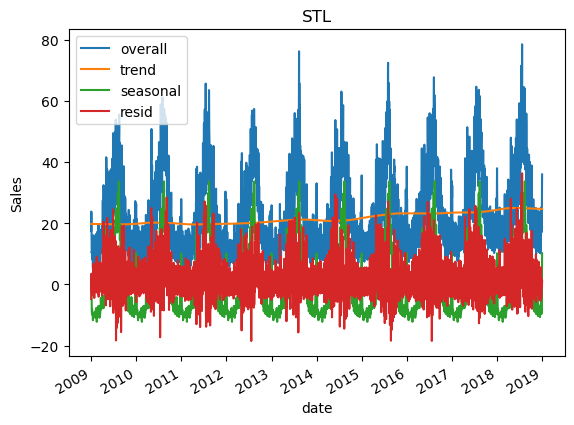

In [26]:
stlo.plot()
stlt.plot()                                       #トレンド（trend）のグラフ描写
stls.plot()                                       #季節性（season）のグラフ描写
stlr.plot()                                       #残差（resid）のグラフ描写
plt.title('STL')                            #グラフタイトル
plt.ylabel('Sales') #タテ軸のラベル
plt.xlabel('date')                                #ヨコ軸のラベル
plt.legend()                                       #凡例表示
plt.show()

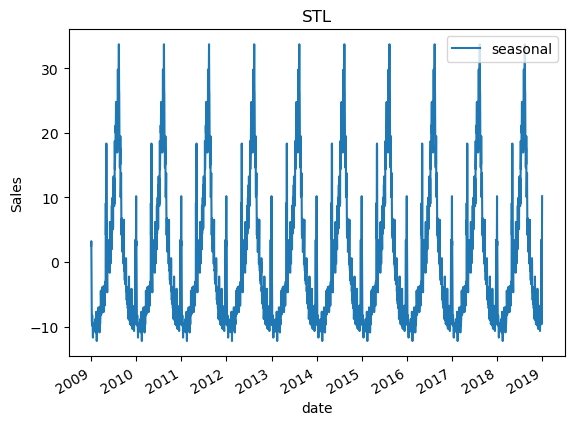

In [27]:
stls.plot()
plt.title('STL')                            #グラフタイトル
plt.ylabel('Sales') #タテ軸のラベル
plt.xlabel('date')                                #ヨコ軸のラベル
plt.legend()                                       #凡例表示
plt.show()

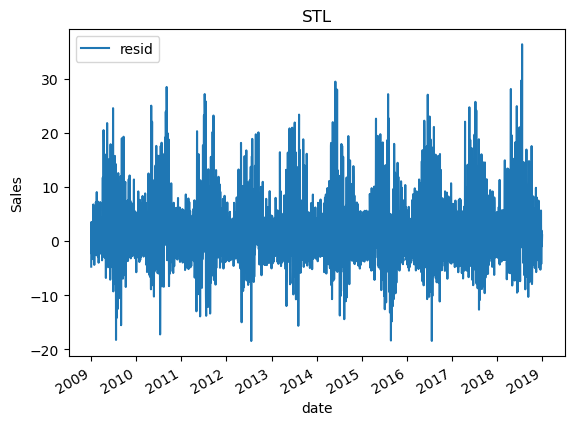

In [28]:
stlr.plot()
plt.title('STL')                            #グラフタイトル
plt.ylabel('Sales') #タテ軸のラベル
plt.xlabel('date')                                #ヨコ軸のラベル
plt.legend()                                       #凡例表示
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


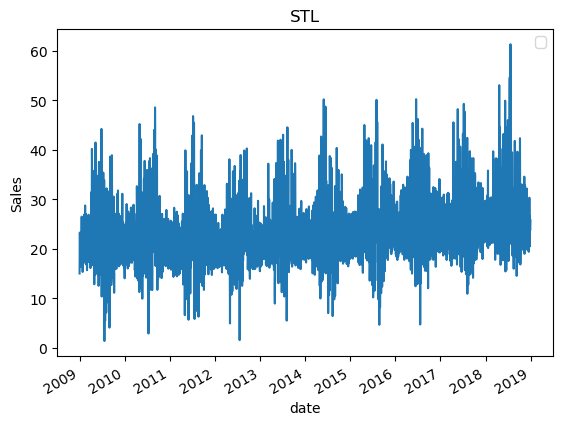

In [29]:
stlt_r.plot()
plt.title('STL')                            #グラフタイトル
plt.ylabel('Sales') #タテ軸のラベル
plt.xlabel('date')                                #ヨコ軸のラベル
plt.legend()                                       #凡例表示
plt.show()

In [30]:
df_temperature=df_train["temperature_difference_2009_2018"]
df_temperature

date
2009-01-01    0.521429
2009-01-02    1.521429
2009-01-03    0.621429
2009-01-04    1.021429
2009-01-05    1.721429
                ...   
2018-12-27    1.100000
2018-12-28   -3.700000
2018-12-29   -2.300000
2018-12-30   -2.000000
2018-12-31   -3.200000
Name: temperature_difference_2009_2018, Length: 3650, dtype: float64

In [31]:
df_holiday=df_train["holiday"]

In [32]:
holiday_np = np.array(df_holiday, dtype=float)

In [33]:
temperature_np = np.array(df_temperature, dtype=float)
temperature_np

array([ 0.52142857,  1.52142857,  0.62142857, ..., -2.3       ,
       -2.        , -3.2       ])

In [34]:
import numpy as np
import plotly.graph_objects as go

In [35]:
# s_temperature：一つ目の説明変数
x1=temperature_np
x1.shape

(3650,)

In [36]:
#holiday_np:二つ目の説明変数
x2=holiday_np
x2

array([1., 1., 1., ..., 1., 1., 1.])

In [37]:
# stl_t_r:目的変数
y=stl_t_r[:365*year]
y.shape

(3650,)

In [38]:
janday=31
febday=janday+28
marday=febday+31
aprday=marday+30
mayday=aprday+31
junday=mayday+30
julday=junday+31
augday=julday+31
sepday=augday+30
octday=sepday+31
novday=octday+30
decday=novday+31

# x1→temperature,x2→holiday

In [39]:
janx1=[]
janx2=[]
jany=[]
i=0
for i in range(year):
    janx1=np.append(janx1,x1[i*365:i*365+janday])
    janx2=np.append(janx2,x2[i*365:i*365+janday])
    jany=np.append(jany,y[i*365:i*365+janday])
    
febx1=[]
febx2=[]
feby=[]
i=0
for i in range(year):
    febx1=np.append(febx1,x1[i*365+janday:i*365+febday])
    febx2=np.append(febx2,x2[i*365+janday:i*365+febday])
    feby=np.append(feby,y[i*365+janday:i*365+febday])
    
marx1=[]
marx2=[]
mary=[]
i=0
for i in range(year):
    marx1=np.append(marx1,x1[i*365+febday:i*365+marday])
    marx2=np.append(marx2,x2[i*365+febday:i*365+marday])
    mary=np.append(mary,y[i*365+febday:i*365+marday])
    
aprx1=[]
aprx2=[]
apry=[]
i=0
for i in range(year):
    aprx1=np.append(aprx1,x1[i*365+marday:i*365+aprday])
    aprx2=np.append(aprx2,x2[i*365+marday:i*365+aprday])
    apry=np.append(apry,y[i*365+marday:i*365+aprday])

mayx1=[]
mayx2=[]
mayy=[]
i=0
for i in range(year):
    mayx1=np.append(mayx1,x1[i*365+aprday:i*365+mayday])
    mayx2=np.append(mayx2,x2[i*365+aprday:i*365+mayday])
    mayy=np.append(mayy,y[i*365+aprday:i*365+mayday])
    
junx1=[]
junx2=[]
juny=[]
i=0
for i in range(year):
    junx1=np.append(junx1,x1[i*365+mayday:i*365+junday])
    junx2=np.append(junx2,x2[i*365+mayday:i*365+junday])
    juny=np.append(juny,y[i*365+mayday:i*365+junday])
    
julx1=[]
julx2=[]
july=[]
i=0
for i in range(year):
    julx1=np.append(julx1,x1[i*365+junday:i*365+julday])
    julx2=np.append(julx2,x2[i*365+junday:i*365+julday])
    july=np.append(july,y[i*365+junday:i*365+julday])
    
augx1=[]
augx2=[]
augy=[]
i=0
for i in range(year):
    augx1=np.append(augx1,x1[i*365+julday:i*365+augday])
    augx2=np.append(augx2,x2[i*365+julday:i*365+augday])
    augy=np.append(augy,y[i*365+julday:i*365+augday])
    
sepx1=[]
sepx2=[]
sepy=[]
i=0
for i in range(year):
    sepx1=np.append(sepx1,x1[i*365+augday:i*365+sepday])
    sepx2=np.append(sepx2,x2[i*365+augday:i*365+sepday])
    sepy=np.append(sepy,y[i*365+augday:i*365+sepday])
    
octx1=[]
octx2=[]
octy=[]
i=0
for i in range(year):
    octx1=np.append(octx1,x1[i*365+sepday:i*365+octday])
    octx2=np.append(octx2,x2[i*365+sepday:i*365+octday])
    octy=np.append(octy,y[i*365+sepday:i*365+octday])
    
novx1=[]
novx2=[]
novy=[]
i=0
for i in range(year):
    novx1=np.append(novx1,x1[i*365+octday:i*365+novday])
    novx2=np.append(novx2,x2[i*365+octday:i*365+novday])
    novy=np.append(novy,y[i*365+octday:i*365+novday])
    
decx1=[]
decx2=[]
decy=[]
i=0
for i in range(year):
    decx1=np.append(decx1,x1[i*365+novday:i*365+decday])
    decx2=np.append(decx2,x2[i*365+novday:i*365+decday])
    decy=np.append(decy,y[i*365+novday:i*365+decday])

In [40]:
col1 = jany
col2 = janx1
col3 = janx2

jandf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})
print(jandf)

         sales  temperature  holiday
0    15.047029     0.521429      1.0
1    20.599737     1.521429      1.0
2    23.307229     0.621429      1.0
3    22.292571     1.021429      1.0
4    17.449289     1.721429      0.0
..         ...          ...      ...
305  29.341540    -2.657143      1.0
306  27.980946    -4.457143      1.0
307  21.523404    -0.257143      0.0
308  23.816365    -3.357143      0.0
309  24.077579    -0.757143      0.0

[310 rows x 3 columns]


In [41]:
col1 = feby
col2 = febx1
col3 = febx2
febdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = mary
col2 = marx1
col3 = marx2
mardf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = apry
col2 = aprx1
col3 = aprx2
aprdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = mayy
col2 = mayx1
col3 = mayx2
maydf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = juny
col2 = junx1
col3 = junx2
jundf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = july
col2 = julx1
col3 = julx2
juldf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = augy
col2 = augx1
col3 = augx2
augdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = sepy
col2 = sepx1
col3 = sepx2
sepdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = octy
col2 = octx1
col3 = octx2
octdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = novy
col2 = novx1
col3 = novx2
novdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = decy
col2 = decx1
col3 = decx2
decdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

In [42]:
"""pdx1=pd.DataFrame(x1)
pdx2=pd.DataFrame(x2)
pdy=pd.DataFrame(y)

x1diff=pdx1.diff(1)
x2diff=pdx2.diff(1)
ydiff=pdy.diff(1)

x1difff=x1diff.drop(x1diff.index[0])
x2difff=x2diff.drop(x2diff.index[0])
ydifff=ydiff.drop(ydiff.index[0])

x1diff2np=x1difff.to_numpy()
x2diff2np=x2difff.to_numpy()
ydiff2np=ydifff.to_numpy()

x1diff1np=list(itertools.chain.from_iterable(x1diff2np))
x2diff1np=list(itertools.chain.from_iterable(x2diff2np))
ydiff1np=list(itertools.chain.from_iterable(ydiff2np))

col1 = ydiff1np
col2 = x1diff1np
col3 = x2diff1np
diffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})
"""

"pdx1=pd.DataFrame(x1)\npdx2=pd.DataFrame(x2)\npdy=pd.DataFrame(y)\n\nx1diff=pdx1.diff(1)\nx2diff=pdx2.diff(1)\nydiff=pdy.diff(1)\n\nx1difff=x1diff.drop(x1diff.index[0])\nx2difff=x2diff.drop(x2diff.index[0])\nydifff=ydiff.drop(ydiff.index[0])\n\nx1diff2np=x1difff.to_numpy()\nx2diff2np=x2difff.to_numpy()\nydiff2np=ydifff.to_numpy()\n\nx1diff1np=list(itertools.chain.from_iterable(x1diff2np))\nx2diff1np=list(itertools.chain.from_iterable(x2diff2np))\nydiff1np=list(itertools.chain.from_iterable(ydiff2np))\n\ncol1 = ydiff1np\ncol2 = x1diff1np\ncol3 = x2diff1np\ndiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})\n"

In [43]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
from scipy.linalg import toeplitz

In [44]:
# ADF検定（原系列）
dftest = adfuller(janx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -11.763037
p-value: 0.000000
Critical values :
	 1% -3.45169128009473
	 5% -2.8709394227049154
	 10% -2.5717780602423517


In [45]:
# ADF検定（原系列）
dftest = adfuller(jany)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -0.957319
p-value: 0.768511
Critical values :
	 1% -3.452789844280995
	 5% -2.871421512222641
	 10% -2.5720351510944512


In [46]:
pdjanx1=pd.DataFrame(janx1)
pdjanx2=pd.DataFrame(janx2)
pdjany=pd.DataFrame(jany)

janx1diff=pdjanx1.diff(1)
janx2diff=pdjanx2.diff(1)
janydiff=pdjany.diff(1)

janx1difff=janx1diff.drop(janx1diff.index[0])
janx2difff=janx2diff.drop(janx2diff.index[0])
janydifff=janydiff.drop(janydiff.index[0])

janx1diff2np=janx1difff.to_numpy()
janx2diff2np=janx2difff.to_numpy()
janydiff2np=janydifff.to_numpy()

janx1diff1np=list(itertools.chain.from_iterable(janx1diff2np))
janx2diff1np=list(itertools.chain.from_iterable(janx2diff2np))
janydiff1np=list(itertools.chain.from_iterable(janydiff2np))

col1 = janydiff1np
col2 = janx1diff1np
col3 = janx2diff1np
jandiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [47]:
# 目的変数(Y)
Y = np.array(jandiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(jandiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     184.4
Date:                    日, 28 1 2024   Prob (F-statistic):           2.80e-53
Time:                        14:08:25   Log-Likelihood:                -729.28
No. Observations:                 309   AIC:                             1465.
Df Residuals:                     306   BIC:                             1476.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0468      0.147      0.319      0.7

In [48]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=jandiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(jandiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=jandiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.627
Model:                            GLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     256.7
Date:                    日, 28 1 2024   Prob (F-statistic):           3.54e-66
Time:                        14:08:25   Log-Likelihood:                -703.48
No. Observations:                 309   AIC:                             1413.
Df Residuals:                     306   BIC:                             1424.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0424      0.097      0.437      

In [49]:
janw1=0.1443
janw2=5.3471
janw0=0.0424

In [50]:
# ADF検定（原系列）
dftest = adfuller(febx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.018951
p-value: 0.000000
Critical values :
	 1% -3.4540935579190495
	 5% -2.8719934111688965
	 10% -2.5723401594120388


In [51]:
# ADF検定（原系列）
dftest = adfuller(feby)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -0.776171
p-value: 0.826022
Critical values :
	 1% -3.455175292841607
	 5% -2.8724677563219485
	 10% -2.57259315846006


In [52]:
pdfebx1=pd.DataFrame(febx1)
pdfebx2=pd.DataFrame(febx2)
pdfeby=pd.DataFrame(feby)

febx1diff=pdfebx1.diff(1)
febx2diff=pdfebx2.diff(1)
febydiff=pdfeby.diff(1)

febx1difff=febx1diff.drop(febx1diff.index[0])
febx2difff=febx2diff.drop(febx2diff.index[0])
febydifff=febydiff.drop(febydiff.index[0])

febx1diff2np=febx1difff.to_numpy()
febx2diff2np=febx2difff.to_numpy()
febydiff2np=febydifff.to_numpy()

febx1diff1np=list(itertools.chain.from_iterable(febx1diff2np))
febx2diff1np=list(itertools.chain.from_iterable(febx2diff2np))
febydiff1np=list(itertools.chain.from_iterable(febydiff2np))

col1 = febydiff1np
col2 = febx1diff1np
col3 = febx2diff1np
febdiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [53]:
# 目的変数(Y)
Y = np.array(febdiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(febdiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     238.4
Date:                    日, 28 1 2024   Prob (F-statistic):           7.37e-61
Time:                        14:08:25   Log-Likelihood:                -647.49
No. Observations:                 279   AIC:                             1301.
Df Residuals:                     276   BIC:                             1312.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0158      0.148      0.106      0.9

In [54]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=febdiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(febdiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=febdiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.739
Model:                            GLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     390.1
Date:                    日, 28 1 2024   Prob (F-statistic):           3.75e-81
Time:                        14:08:25   Log-Likelihood:                -606.89
No. Observations:                 279   AIC:                             1220.
Df Residuals:                     276   BIC:                             1231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0164      0.085      0.192      

In [55]:
febw1=0.1067
febw2=5.8106
febw0=0.0164

In [56]:
# ADF検定（原系列）
dftest = adfuller(marx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.033091
p-value: 0.000000
Critical values :
	 1% -3.45169128009473
	 5% -2.8709394227049154
	 10% -2.5717780602423517


In [57]:
# ADF検定（原系列）
dftest = adfuller(mary)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -0.267110
p-value: 0.930035
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [58]:
pdmarx1=pd.DataFrame(marx1)
pdmarx2=pd.DataFrame(marx2)
pdmary=pd.DataFrame(mary)

marx1diff=pdmarx1.diff(1)
marx2diff=pdmarx2.diff(1)
marydiff=pdmary.diff(1)

marx1difff=marx1diff.drop(marx1diff.index[0])
marx2difff=marx2diff.drop(marx2diff.index[0])
marydifff=marydiff.drop(marydiff.index[0])

marx1diff2np=marx1difff.to_numpy()
marx2diff2np=marx2difff.to_numpy()
marydiff2np=marydifff.to_numpy()

marx1diff1np=list(itertools.chain.from_iterable(marx1diff2np))
marx2diff1np=list(itertools.chain.from_iterable(marx2diff2np))
marydiff1np=list(itertools.chain.from_iterable(marydiff2np))

col1 = marydiff1np
col2 = marx1diff1np
col3 = marx2diff1np
mardiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

In [59]:

# 目的変数(Y)
Y = np.array(mardiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(mardiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     284.5
Date:                    日, 28 1 2024   Prob (F-statistic):           1.52e-70
Time:                        14:08:25   Log-Likelihood:                -769.03
No. Observations:                 309   AIC:                             1544.
Df Residuals:                     306   BIC:                             1555.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0251      0.167      0.151      0.8

In [60]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=mardiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(mardiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=mardiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.723
Model:                            GLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     399.7
Date:                    日, 28 1 2024   Prob (F-statistic):           4.60e-86
Time:                        14:08:25   Log-Likelihood:                -739.99
No. Observations:                 309   AIC:                             1486.
Df Residuals:                     306   BIC:                             1497.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0263      0.108      0.244      

In [61]:
marw1=0.2503
marw2=7.2812
marw0=0.0263

In [62]:
# ADF検定（原系列）
dftest = adfuller(aprx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.994604
p-value: 0.000000
Critical values :
	 1% -3.4524113009049935
	 5% -2.8712554127251764
	 10% -2.571946570731871


In [63]:
# ADF検定（原系列）
dftest = adfuller(apry)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -1.226538
p-value: 0.662077
Critical values :
	 1% -3.453670163592738
	 5% -2.8718077069772248
	 10% -2.5722411158835796


In [64]:
pdaprx1=pd.DataFrame(aprx1)
pdaprx2=pd.DataFrame(aprx2)
pdapry=pd.DataFrame(apry)

aprx1diff=pdaprx1.diff(1)
aprx2diff=pdaprx2.diff(1)
aprydiff=pdapry.diff(1)

aprx1difff=aprx1diff.drop(aprx1diff.index[0])
aprx2difff=aprx2diff.drop(aprx2diff.index[0])
aprydifff=aprydiff.drop(aprydiff.index[0])

aprx1diff2np=aprx1difff.to_numpy()
aprx2diff2np=aprx2difff.to_numpy()
aprydiff2np=aprydifff.to_numpy()

aprx1diff1np=list(itertools.chain.from_iterable(aprx1diff2np))
aprx2diff1np=list(itertools.chain.from_iterable(aprx2diff2np))
aprydiff1np=list(itertools.chain.from_iterable(aprydiff2np))

col1 = aprydiff1np
col2 = aprx1diff1np
col3 = aprx2diff1np
aprdiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [65]:
# 目的変数(Y)
Y = np.array(aprdiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(aprdiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     185.5
Date:                    日, 28 1 2024   Prob (F-statistic):           6.13e-53
Time:                        14:08:25   Log-Likelihood:                -874.76
No. Observations:                 299   AIC:                             1756.
Df Residuals:                     296   BIC:                             1767.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.262      0.032      0.9

In [66]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=aprdiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(aprdiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=aprdiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.614
Model:                            GLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     235.7
Date:                    日, 28 1 2024   Prob (F-statistic):           5.86e-62
Time:                        14:08:25   Log-Likelihood:                -855.13
No. Observations:                 299   AIC:                             1716.
Df Residuals:                     296   BIC:                             1727.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0105      0.182      0.058      

In [67]:
aprw1=0.2979
aprw2=9.1832
aprw0=0.0105

In [68]:
# ADF検定（原系列）
dftest = adfuller(mayx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.342562
p-value: 0.000000
Critical values :
	 1% -3.4518314994261337
	 5% -2.8710009653519166
	 10% -2.571810878948318


In [69]:
# ADF検定（原系列）
dftest = adfuller(mayy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -1.684495
p-value: 0.439118
Critical values :
	 1% -3.452789844280995
	 5% -2.871421512222641
	 10% -2.5720351510944512


In [70]:
pdmayx1=pd.DataFrame(mayx1)
pdmayx2=pd.DataFrame(mayx2)
pdmayy=pd.DataFrame(mayy)

mayx1diff=pdmayx1.diff(1)
mayx2diff=pdmayx2.diff(1)
mayydiff=pdmayy.diff(1)

mayx1difff=mayx1diff.drop(mayx1diff.index[0])
mayx2difff=mayx2diff.drop(mayx2diff.index[0])
mayydifff=mayydiff.drop(mayydiff.index[0])

mayx1diff2np=mayx1difff.to_numpy()
mayx2diff2np=mayx2difff.to_numpy()
mayydiff2np=mayydifff.to_numpy()

mayx1diff1np=list(itertools.chain.from_iterable(mayx1diff2np))
mayx2diff1np=list(itertools.chain.from_iterable(mayx2diff2np))
mayydiff1np=list(itertools.chain.from_iterable(mayydiff2np))

col1 = mayydiff1np
col2 = mayx1diff1np
col3 = mayx2diff1np
maydiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [71]:
# 目的変数(Y)
Y = np.array(maydiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(maydiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     189.6
Date:                    日, 28 1 2024   Prob (F-statistic):           2.76e-54
Time:                        14:08:25   Log-Likelihood:                -993.09
No. Observations:                 309   AIC:                             1992.
Df Residuals:                     306   BIC:                             2003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0220      0.344      0.064      0.9

In [72]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=maydiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(maydiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=maydiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.611
Model:                            GLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     240.3
Date:                    日, 28 1 2024   Prob (F-statistic):           1.81e-63
Time:                        14:08:25   Log-Likelihood:                -968.56
No. Observations:                 309   AIC:                             1943.
Df Residuals:                     306   BIC:                             1954.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0144      0.230      0.063      

In [73]:
mayw1=0.8339
mayw2=10.9740
mayw0=0.0144

In [74]:
# ADF検定（原系列）
dftest = adfuller(junx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -10.963805
p-value: 0.000000
Critical values :
	 1% -3.4524113009049935
	 5% -2.8712554127251764
	 10% -2.571946570731871


In [75]:
# ADF検定（原系列）
dftest = adfuller(juny)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -2.365950
p-value: 0.151578
Critical values :
	 1% -3.4535050041524245
	 5% -2.8717352599720294
	 10% -2.5722024776854417


In [76]:
pdjunx1=pd.DataFrame(junx1)
pdjunx2=pd.DataFrame(junx2)
pdjuny=pd.DataFrame(juny)

junx1diff=pdjunx1.diff(1)
junx2diff=pdjunx2.diff(1)
junydiff=pdjuny.diff(1)

junx1difff=junx1diff.drop(junx1diff.index[0])
junx2difff=junx2diff.drop(junx2diff.index[0])
junydifff=junydiff.drop(junydiff.index[0])

junx1diff2np=junx1difff.to_numpy()
junx2diff2np=junx2difff.to_numpy()
junydiff2np=junydifff.to_numpy()

junx1diff1np=list(itertools.chain.from_iterable(junx1diff2np))
junx2diff1np=list(itertools.chain.from_iterable(junx2diff2np))
junydiff1np=list(itertools.chain.from_iterable(junydiff2np))

col1 = junydiff1np
col2 = junx1diff1np
col3 = junx2diff1np
jundiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [77]:
# 目的変数(Y)
Y = np.array(jundf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(jundf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     405.9
Date:                    日, 28 1 2024   Prob (F-statistic):           1.11e-85
Time:                        14:08:26   Log-Likelihood:                -850.26
No. Observations:                 300   AIC:                             1707.
Df Residuals:                     297   BIC:                             1718.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9575      0.282     70.664      0.0

In [78]:
# 目的変数(Y)
Y = np.array(jundiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(jundiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     348.8
Date:                    日, 28 1 2024   Prob (F-statistic):           1.45e-78
Time:                        14:08:26   Log-Likelihood:                -910.89
No. Observations:                 299   AIC:                             1828.
Df Residuals:                     296   BIC:                             1839.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.296      0.031      0.9

In [79]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=jundiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(jundiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=jundiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.790
Model:                            GLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     557.6
Date:                    日, 28 1 2024   Prob (F-statistic):          4.08e-101
Time:                        14:08:26   Log-Likelihood:                -869.13
No. Observations:                 299   AIC:                             1744.
Df Residuals:                     296   BIC:                             1755.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0092      0.173      0.053      

In [80]:
#↑1.824<x<2.176がダービンワトソンで引っかからない範囲
#https://real-statistics.com/statistics-tables/durbin-watson-table/

In [81]:
junw1=0.8848
junw2=13.6665
junw0=0.0092

In [82]:
# ADF検定（原系列）
dftest = adfuller(julx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.278738
p-value: 0.000000
Critical values :
	 1% -3.451973573620699
	 5% -2.8710633193086648
	 10% -2.5718441306100512


In [83]:
# ADF検定（原系列）
dftest = adfuller(july)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -3.591469
p-value: 0.005926
Critical values :
	 1% -3.4521175397304784
	 5% -2.8711265007266666
	 10% -2.571877823851692


In [84]:
# 目的変数(Y)
Y = np.array(juldf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(juldf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     238.9
Date:                    日, 28 1 2024   Prob (F-statistic):           2.75e-63
Time:                        14:08:26   Log-Likelihood:                -995.73
No. Observations:                 310   AIC:                             1997.
Df Residuals:                     307   BIC:                             2009.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6330      0.416     47.235      0.0

In [85]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=juldf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(juldf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=juldf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.583
Model:                            GLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     214.4
Date:                    日, 28 1 2024   Prob (F-statistic):           5.27e-59
Time:                        14:08:26   Log-Likelihood:                -975.44
No. Observations:                 310   AIC:                             1957.
Df Residuals:                     307   BIC:                             1968.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.6297      0.540     36.348      

In [86]:
julw1=0.8912
julw2=13.7998
julw0=19.6297

In [87]:
# ADF検定（原系列）
dftest = adfuller(augx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.315885
p-value: 0.000000
Critical values :
	 1% -3.45169128009473
	 5% -2.8709394227049154
	 10% -2.5717780602423517


In [88]:
# ADF検定（原系列）
dftest = adfuller(augy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.047034
p-value: 0.001183
Critical values :
	 1% -3.452636878592149
	 5% -2.8713543954331433
	 10% -2.5719993576515705


In [89]:

# 目的変数(Y)
Y = np.array(augdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(augdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     182.7
Date:                    日, 28 1 2024   Prob (F-statistic):           5.55e-53
Time:                        14:08:26   Log-Likelihood:                -959.80
No. Observations:                 310   AIC:                             1926.
Df Residuals:                     307   BIC:                             1937.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8143      0.369     53.645      0.0

In [90]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday', data=augdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(augdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday', data=augdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.550
Model:                            GLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     188.0
Date:                    日, 28 1 2024   Prob (F-statistic):           5.00e-54
Time:                        14:08:26   Log-Likelihood:                -934.88
No. Observations:                 310   AIC:                             1876.
Df Residuals:                     307   BIC:                             1887.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.5137      0.494     39.491      

In [91]:
augw1=0.9733
augw2=10.9925
augw0=19.5137

In [92]:
# ADF検定（原系列）
dftest = adfuller(sepx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.739011
p-value: 0.000000
Critical values :
	 1% -3.4524113009049935
	 5% -2.8712554127251764
	 10% -2.571946570731871


In [93]:
# ADF検定（原系列）
dftest = adfuller(sepy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.549563
p-value: 0.000160
Critical values :
	 1% -3.453670163592738
	 5% -2.8718077069772248
	 10% -2.5722411158835796


In [94]:

# 目的変数(Y)
Y = np.array(sepdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(sepdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     292.3
Date:                    日, 28 1 2024   Prob (F-statistic):           6.76e-71
Time:                        14:08:26   Log-Likelihood:                -861.55
No. Observations:                 300   AIC:                             1729.
Df Residuals:                     297   BIC:                             1740.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5505      0.309     63.371      0.0

In [95]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~temperature+holiday ', data=sepdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(sepdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=sepdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.629
Model:                            GLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     251.2
Date:                    日, 28 1 2024   Prob (F-statistic):           1.37e-64
Time:                        14:08:26   Log-Likelihood:                -849.78
No. Observations:                 300   AIC:                             1706.
Df Residuals:                     297   BIC:                             1717.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.6670      0.377     52.211      

In [96]:
sepw1=0.6826
sepw2=10.7910
sepw0=19.6670

In [97]:
# ADF検定（原系列）
dftest = adfuller(octx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.720047
p-value: 0.000001
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [98]:
# ADF検定（原系列）
dftest = adfuller(octy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.550368
p-value: 0.000159
Critical values :
	 1% -3.4521175397304784
	 5% -2.8711265007266666
	 10% -2.571877823851692


In [99]:
# 目的変数(Y)
Y = np.array(octdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(octdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     269.3
Date:                    日, 28 1 2024   Prob (F-statistic):           2.89e-68
Time:                        14:08:26   Log-Likelihood:                -789.86
No. Observations:                 310   AIC:                             1586.
Df Residuals:                     307   BIC:                             1597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6882      0.214     92.016      0.0

In [100]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=octdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(octdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=octdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.645
Model:                            GLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     279.2
Date:                    日, 28 1 2024   Prob (F-statistic):           8.13e-70
Time:                        14:08:26   Log-Likelihood:                -757.71
No. Observations:                 310   AIC:                             1521.
Df Residuals:                     307   BIC:                             1533.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.7340      0.302     65.242      

In [101]:
octw1=0.2985
octw2=8.3963
octw0=19.7340

In [102]:
# ADF検定（原系列）
dftest = adfuller(novx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.018868
p-value: 0.000000
Critical values :
	 1% -3.453342167806272
	 5% -2.871663828287282
	 10% -2.572164381381345


In [103]:
# ADF検定（原系列）
dftest = adfuller(novy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -0.885342
p-value: 0.792761
Critical values :
	 1% -3.4535050041524245
	 5% -2.8717352599720294
	 10% -2.5722024776854417


In [104]:
pdnovx1=pd.DataFrame(novx1)
pdnovx2=pd.DataFrame(novx2)
pdnovy=pd.DataFrame(novy)

novx1diff=pdnovx1.diff(1)
novx2diff=pdnovx2.diff(1)
novydiff=pdnovy.diff(1)

novx1difff=novx1diff.drop(novx1diff.index[0])
novx2difff=novx2diff.drop(novx2diff.index[0])
novydifff=novydiff.drop(novydiff.index[0])

novx1diff2np=novx1difff.to_numpy()
novx2diff2np=novx2difff.to_numpy()
novydiff2np=novydifff.to_numpy()

novx1diff1np=list(itertools.chain.from_iterable(novx1diff2np))
novx2diff1np=list(itertools.chain.from_iterable(novx2diff2np))
novydiff1np=list(itertools.chain.from_iterable(novydiff2np))

col1 = novydiff1np
col2 = novx1diff1np
col3 = novx2diff1np
novdiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [105]:
# 目的変数(Y)
Y = np.array(novdiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(novdiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     172.7
Date:                    日, 28 1 2024   Prob (F-statistic):           2.00e-50
Time:                        14:08:27   Log-Likelihood:                -767.39
No. Observations:                 299   AIC:                             1541.
Df Residuals:                     296   BIC:                             1552.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.183      0.016      0.9

In [106]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=novdiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(novdiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=novdiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            GLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     233.2
Date:                    日, 28 1 2024   Prob (F-statistic):           1.54e-61
Time:                        14:08:27   Log-Likelihood:                -744.33
No. Observations:                 299   AIC:                             1495.
Df Residuals:                     296   BIC:                             1506.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0086      0.124      0.069      

In [107]:
novw1=0.1788
novw2=6.0022
novw0=0.0086

In [108]:
# ADF検定（原系列）
dftest = adfuller(decx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.699053
p-value: 0.000000
Critical values :
	 1% -3.45176116018037
	 5% -2.870970093607691
	 10% -2.571794416006072


In [109]:
# ADF検定（原系列）
dftest = adfuller(decy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -1.145123
p-value: 0.696746
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [110]:
pddecx1=pd.DataFrame(decx1)
pddecx2=pd.DataFrame(decx2)
pddecy=pd.DataFrame(decy)

decx1diff=pddecx1.diff(1)
decx2diff=pddecx2.diff(1)
decydiff=pddecy.diff(1)

decx1difff=decx1diff.drop(decx1diff.index[0])
decx2difff=decx2diff.drop(decx2diff.index[0])
decydifff=decydiff.drop(decydiff.index[0])

decx1diff2np=decx1difff.to_numpy()
decx2diff2np=decx2difff.to_numpy()
decydiff2np=decydifff.to_numpy()

decx1diff1np=list(itertools.chain.from_iterable(decx1diff2np))
decx2diff1np=list(itertools.chain.from_iterable(decx2diff2np))
decydiff1np=list(itertools.chain.from_iterable(decydiff2np))

col1 = decydiff1np
col2 = decx1diff1np
col3 = decx2diff1np
decdiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})


In [111]:

# 目的変数(Y)
Y = np.array(decdiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(decdiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     144.2
Date:                    日, 28 1 2024   Prob (F-statistic):           7.71e-45
Time:                        14:08:27   Log-Likelihood:                -797.34
No. Observations:                 309   AIC:                             1601.
Df Residuals:                     306   BIC:                             1612.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.183      0.030      0.9

In [112]:

### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~temperature+holiday', data=decdiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(decdiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday', data=decdiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.535
Model:                            GLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     176.2
Date:                    日, 28 1 2024   Prob (F-statistic):           1.20e-51
Time:                        14:08:27   Log-Likelihood:                -775.96
No. Observations:                 309   AIC:                             1558.
Df Residuals:                     306   BIC:                             1569.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0023      0.125      0.018      

In [113]:
decw1=0.1260
decw2=5.4995
decw0=0.0023

In [114]:
df_test

,sales,tokyo_temperature,holiday,Unnamed: 4,temperature_difference_2009_2018,temperature_difference_2019_2021,Unnamed: 7,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,AVERAGE2009-2018,AVERAGE2019-2021
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,31.04,10.7,1,NaN,0.742857,0.133333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,30.79,10.9,1,NaN,0.942857,0.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,24.15,10.9,1,NaN,0.942857,0.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,16.34,9.8,0,NaN,-0.157143,-0.766667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,19.10,14.0,1,NaN,4.042857,3.433333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,18.54,13.7,0,NaN,1.600000,1.233333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,24.99,10.9,1,NaN,-1.200000,-1.566667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,33.16,10.9,1,NaN,-1.200000,-1.566667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
actual_temperature=df_test["temperature_difference_2009_2018"]
actual_temperature

date
2019-01-01    0.742857
2019-01-02    0.942857
2019-01-03    0.942857
2019-01-04   -0.157143
2019-01-05    4.042857
                ...   
2019-12-27    1.600000
2019-12-28   -1.200000
2019-12-29   -1.200000
2019-12-30   -3.300000
2019-12-31    4.400000
Name: temperature_difference_2009_2018, Length: 365, dtype: float64

In [116]:
actual_temperature_np = np.array(actual_temperature, dtype=float)

In [117]:
actual_holiday=df_test["holiday"]
actual_holiday

date
2019-01-01    1
2019-01-02    1
2019-01-03    1
2019-01-04    0
2019-01-05    1
             ..
2019-12-27    0
2019-12-28    1
2019-12-29    1
2019-12-30    1
2019-12-31    1
Name: holiday, Length: 365, dtype: int64

In [118]:
actual_holiday_np = np.array(actual_holiday, dtype=float)

In [119]:
pred_resid=[]
for i in range(31):
    pred_resid.append(actual_temperature_np[i]*janw1+actual_holiday_np[i]*janw2+janw0)
for i in range(28):
    pred_resid.append(actual_temperature_np[i+janday]*febw1+actual_holiday_np[i+janday]*febw2+febw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+febday]*marw1+actual_holiday_np[i+febday]*marw2+marw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+marday]*aprw1+actual_holiday_np[i+marday]*aprw2+aprw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+aprday]*mayw1+actual_holiday_np[i+aprday]*mayw2+mayw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+mayday]*junw1+actual_holiday_np[i+mayday]*junw2+junw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+junday]*julw1+actual_holiday_np[i+junday]*julw2+julw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+julday]*augw1+actual_holiday_np[i+julday]*augw2+augw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+augday]*sepw1+actual_holiday_np[i+augday]*sepw2+sepw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+sepday]*octw1+actual_holiday_np[i+sepday]*octw2+octw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+octday]*novw1+actual_holiday_np[i+octday]*novw2+novw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+novday]*decw1+actual_holiday_np[i+novday]*decw2+decw0)

In [120]:
#pred_resid=[]
#for i in range(365):
   # pred_resid.append(s_actual_temperature[i]*w1+s_actual_holiday[i]*w2+w0)

In [121]:
pred_resids = np.array(pred_resid)
pred_resids.shape

(365,)

In [122]:
time = np.arange(365*year+365, dtype="float32")
time_valid=time[365*year:]
x_valid=stl_t_r[365*year:]

In [123]:
x_valid.shape

(365,)

In [124]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

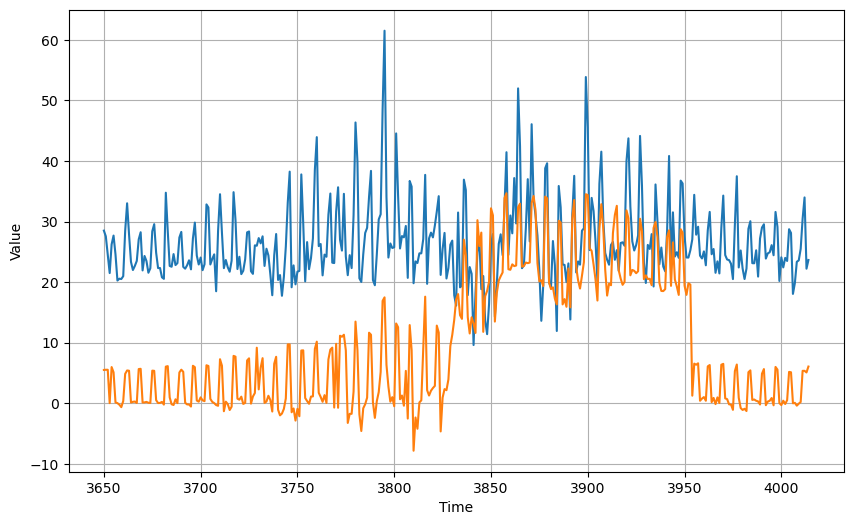

In [125]:
resid_test_pred = np.array(pred_resid[0:])
resid_test_pred.shape

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, resid_test_pred)

In [126]:
print('RMSE : ',np.sqrt(((x_valid -resid_test_pred )**2).mean()))

RMSE :  19.712549663643173


In [127]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [128]:
df_19=df["2009-01-01":"2019-12-31"]

In [129]:
sales=df_19["sales"]
sales

date
2009-01-01    17.59
2009-01-02    23.83
2009-01-03    22.94
2009-01-04    17.14
2009-01-05    10.32
              ...  
2019-12-27    18.54
2019-12-28    24.99
2019-12-29    33.16
2019-12-30    25.73
2019-12-31    33.84
Name: sales, Length: 4015, dtype: float64

In [130]:
sales_train=sales["2009-01-01":"2018-12-31"]
sales_test=sales["2019-01-01":"2019-12-31"]

In [131]:
pred_s=stl_s[:365]
pred_s

array([  2.5429708 ,   3.23026295,  -0.36722933,  -5.15257145,
        -7.12928868,  -9.03908609,  -9.51916376,  -9.81379404,
        -8.23401885,  -9.62787587,  -9.48022992,  -9.7829115 ,
        -9.72140518, -10.45199863, -11.67716578, -10.04440531,
       -10.11046866, -10.43865618, -10.12896566,  -9.83780259,
       -10.68923751, -10.59258637,  -9.40038185, -10.51480436,
        -9.83124755,  -9.87137818,  -9.73153957, -10.75094592,
       -10.62340365, -10.17636535,  -9.34757928,  -8.81862673,
        -9.95767457,  -9.39675694, -10.6009965 ,  -9.87208233,
       -10.67243293,  -8.95897284, -10.57684032, -10.34095104,
        -9.00645536,  -7.67440763, -10.21586388, -10.98557159,
        -9.79937923, -12.20609423, -10.3652562 , -10.41613147,
        -9.72915813, -10.62713931, -10.04904093,  -9.16003532,
        -9.68077652,  -9.50892768,  -9.58824286,  -8.81925929,
        -9.43398839,  -9.26063212,  -8.24788869,  -6.99919777,
        -7.80830382,  -7.21957342, -10.19620766,  -9.42

In [132]:
pred_sales=[]
pred_sales=resid_test_pred+pred_s

In [133]:
actual=df_test["sales"]
actual_sales= np.array(actual)
actual_sales.shape

(365,)

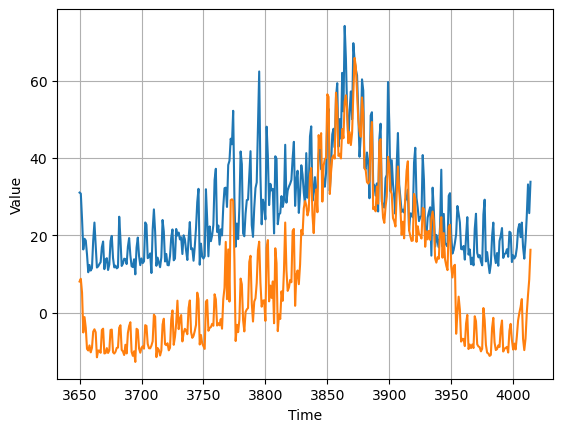

In [134]:
plot_series(time_valid,actual_sales)
plot_series(time_valid, pred_sales)

In [135]:
print('RMSE : ',np.sqrt(((actual_sales - pred_sales)**2).mean()))
mae=mean_absolute_error(actual_sales, pred_sales)
print('MAE : ',mae)

RMSE :  19.712549663643173
MAE :  17.456851795690785
